In [ ]:
!pip3 install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82807 sha256=9eddca638ca7be8a909dd53c0a40e09512b3b08b591e15c1c8bec96c14f5cacc
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=675f18c4aa3fadfd39e82318aaf017a06bc5a213d665d31c531009c377ed8f9f
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
import warnings
warnings.simplefilter(action='ignore')

import numpy as np
import pandas as pd

import pickle
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

import keras
import umap

from google.colab import drive

drive.mount("/content/drive")

figpath = "/content/drive/My Drive/plasticc_train_data/Figures"

Mounted at /content/drive


In [ ]:
file_to_class = {'lc_classnum_PISN_old.pickle': 'PISN', 'lc_classnum_ILOT_old.pickle': 'ILOT',
'lc_classnum_Kilonova.pickle': 'KNe', 'lc_classnum_uLens-BSR.pickle': 'uLens-BSR', 'lc_classnum_CART_old.pickle': 'CaRT', 'lc_classnum_TDE.pickle': 'TDE', 'lc_classnum_SLSN-I.pickle': 'SLSN-I', 'lc_classnum_Ic.pickle': 'SNIc', 'lc_classnum_Ic-BL.pickle': 'SNIc-BL', 'lc_classnum_II.pickle': 'SNII', 'lc_classnum_IIb.pickle': 'SNIIb', 'lc_classnum_Ib.pickle': 'SNIb', 'lc_classnum_IIn.pickle': 'SNIIn', 'lc_classnum_Ia-91bg.pickle': 'SNIa-91bg', 'lc_classnum_Iax.pickle': 'SNIax', 'lc_classnum_Ia.pickle': 'SNIa'}

file_names = ['lc_classnum_PISN_old.pickle',
 'lc_classnum_ILOT_old.pickle',
 'lc_classnum_CART_old.pickle',
 'lc_classnum_Ia.pickle',
 'lc_classnum_Kilonova.pickle',
 'lc_classnum_TDE.pickle',
 'lc_classnum_SLSN-I.pickle',
 'lc_classnum_Ic.pickle',
 'lc_classnum_Ic-BL.pickle',
 'lc_classnum_II.pickle',
 'lc_classnum_IIb.pickle',
 'lc_classnum_Ib.pickle',
 'lc_classnum_IIn.pickle',
 'lc_classnum_Ia-91bg.pickle',
 'lc_classnum_Iax.pickle',
 'lc_classnum_AGN_old.pickle']

non_anom_classes = ['lc_classnum_II.pickle',
 'lc_classnum_IIb.pickle', 'lc_classnum_IIn.pickle',
 'lc_classnum_Ia-91bg.pickle', 'lc_classnum_Ia.pickle',
 'lc_classnum_Iax.pickle', 'lc_classnum_Ib.pickle',
 'lc_classnum_Ic-BL.pickle', 'lc_classnum_Ic.pickle',
 'lc_classnum_SLSN-I.pickle', 'lc_classnum_TDE.pickle']

class_names = ["PISN", "ILOT", "CaRT", "SNIa", "KNe", "TDE", "SLSN-I", "SNIc", "SNIc-BL", "SNII", "SNIIb", "SNIb", "SNIIn", "SNIa-91bg", "SNIax", "AGN", "uLens-BSR"]

non_anom_classes = ['lc_classnum_II.pickle',
 'lc_classnum_IIb.pickle', 'lc_classnum_IIn.pickle',
 'lc_classnum_Ia-91bg.pickle', 'lc_classnum_Ia.pickle',
 'lc_classnum_Iax.pickle', 'lc_classnum_Ib.pickle',
 'lc_classnum_Ic-BL.pickle', 'lc_classnum_Ic.pickle',
 'lc_classnum_SLSN-I.pickle', 'lc_classnum_TDE.pickle']

non_anom_labels = [file_to_class[i] for i in non_anom_classes]

num_to_class = []

num_classes = len(non_anom_classes)

for i in range(num_classes):

    num_to_class.append(file_to_class[non_anom_classes[i]])

In [ ]:
model = keras.models.load_model('/content/drive/My Drive/plasticc_train_data/trained_model')
def load(file_name):
    with open(file_name, 'rb') as f:
        return pickle.load(f)

target = load("/content/drive/My Drive/plasticc_train_data/preprocesseddata/target")
x = load("/content/drive/My Drive/plasticc_train_data/preprocesseddata/x_train")
host_galaxy_info = load("/content/drive/My Drive/plasticc_train_data/preprocesseddata/host_galaxy_info")



In [ ]:
x = load("/content/drive/My Drive/plasticc_train_data/preprocesseddata/x_train")
host_galaxy_info = load("/content/drive/My Drive/plasticc_train_data/preprocesseddata/host_galaxy_info")

In [ ]:
classes = np.unique(target)

anom_inds = [1, 5, 12, 13, 16]
for i in anom_inds:
    print(classes[i])

# Indices of anomalous classes

lc_classnum_CART_old.pickle
lc_classnum_ILOT_old.pickle
lc_classnum_Kilonova.pickle
lc_classnum_PISN_old.pickle
lc_classnum_uLens-BSR.pickle


In [ ]:
# Cut everything with less than 10 points and get length of all lc's

lengths = []
delete = []

for ind, val in enumerate(x):
  if (len(val) < 10):
    delete.append(ind)
  lengths.append(len(val))

In [ ]:

for i in range(len(delete) - 1, -1, -1):
    del x[delete[i]]
    del target[delete[i]]
    del host_galaxy_info[delete[i]]

In [ ]:
# Log of Peak Flux

host_galaxy_info = np.array(host_galaxy_info)

host_galaxy_info[:, 3] = np.log(host_galaxy_info[:, 3])
host_galaxy_info[:, 2] = np.log(host_galaxy_info[:, 2])

In [ ]:
# shouldn't be negative

delete = []

for ind, i in enumerate(host_galaxy_info):
    if (np.isnan(host_galaxy_info[ind][2]) or np.isnan(host_galaxy_info[ind][3])):
        delete.append(ind)

In [ ]:
host_galaxy_info = list(host_galaxy_info)

for i in range(len(delete) - 1, -1, -1):

    del x[delete[i]]
    del target[delete[i]]
    del host_galaxy_info[delete[i]]

In [ ]:
host_galaxy_info = np.array(host_galaxy_info)
host_galaxy_info[:, 2] = host_galaxy_info[:, 2] / 10
host_galaxy_info[:, 3] = host_galaxy_info[:, 3] / 10

# Divide peaks by 10 for further scaling

In [ ]:
# Pad for TF masking layer

ntimesteps = np.max(lengths)

for ind in range(len(x)):
  x[ind] = np.pad(x[ind], ((0, ntimesteps - len(x[ind])), (0, 0)))

In [ ]:
# Split data

y_data_anom = []
y_data = []
x_data = []
x_data_anom = []
host_gal_anom = []
host_gal = []

anom_classes = [classes[i] for i in anom_inds]

for i in range(len(target)):
    if (target[i] == 'lc_classnum_AGN_old.pickle'): # ignore AGNS
        continue
    if (target[i] in anom_classes):
        x_data_anom.append(x[i])
        y_data_anom.append(target[i])
        host_gal_anom.append(host_galaxy_info[i])

    else:
        x_data.append(x[i])
        y_data.append(target[i])
        host_gal.append(host_galaxy_info[i])



In [ ]:
# One-hot Encoding

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

y_data = enc.fit_transform(np.array(y_data).reshape(-1, 1)).todense()

In [ ]:
# Train-test split

X_train, X_test, host_gal_train, host_gal_test, y_train, y_test = train_test_split(x_data, host_gal, y_data, random_state = 40, test_size = 0.1)

X_train, X_val, host_gal_train, host_gal_val, y_train, y_val = train_test_split(X_train, host_gal_train, y_train, random_state = 40, test_size = 0.125)

In [ ]:
# Get class names in order, just to be sure

dummy = enc.transform(np.array(non_anom_classes).reshape(-1, 1))

ordered_class_names = [file_to_class[non_anom_classes[np.argmax(i)]] for i in dummy.todense()]

In [ ]:
# Load Anomaly Detector

from keras.models import Model
latent_model = keras.models.load_model('/content/drive/My Drive/plasticc_train_data/trained_model')
latent_model = Model(inputs=[latent_model.get_layer('input_17').input, latent_model.get_layer('input_18').input], outputs=latent_model.get_layer('dense_35').output) # remove last layer

In [ ]:
X_train = np.array(X_train)
host_gal_train = np.array(host_gal_train)

train_predictions = latent_model.predict([X_train, host_gal_train])

3053/3053 [==============================] - 599s 196ms/step


In [ ]:
latent_observations_majority = latent_model.predict([np.array(X_test), np.array(host_gal_test)])
latent_observations_minority = latent_model.predict([np.array(x_data_anom), np.array(host_gal_anom)])

1506/1506 [==============================] - 287s 190ms/step


In [ ]:
import umap.umap_ as umap


reducer = umap.UMAP(random_state=5, min_dist=0.5, n_neighbors=500)

reducer.fit(train_predictions)

UMAP(min_dist=0.5, n_neighbors=500, random_state=5, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [ ]:
embedding = reducer.transform(train_predictions)

In [ ]:
color = ['r', 'g', 'y', 'b', 'pink', 'orange', 'gray', 'k', 'm', 'c', 'brown']

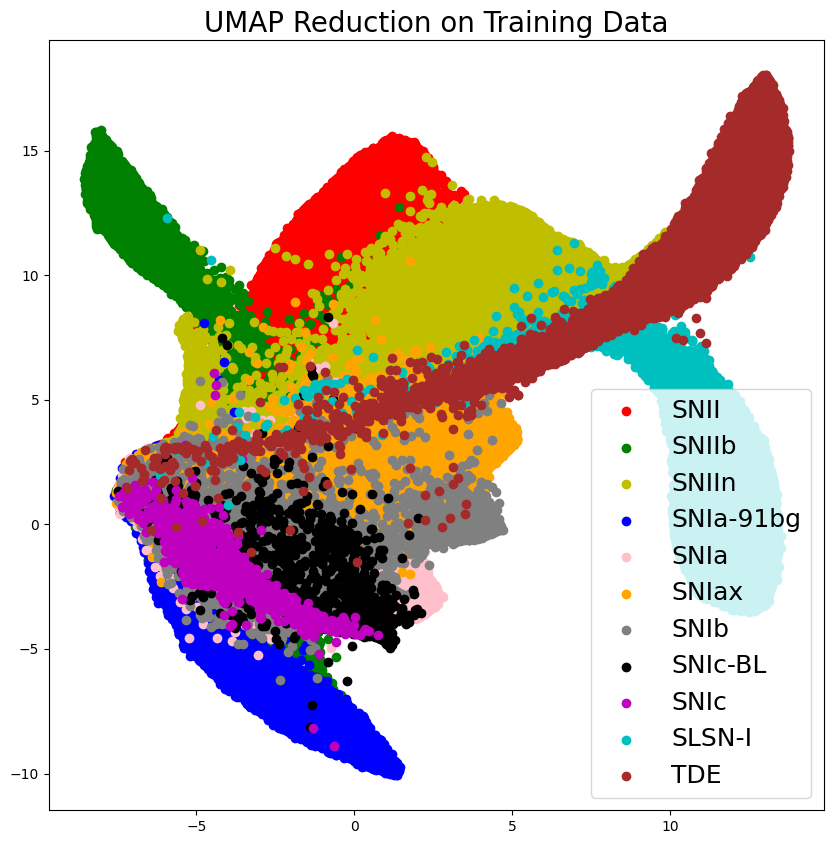

In [ ]:




plt.figure(figsize=(10, 10))
for i in range(11):
    e=[]
    for ind, point in  enumerate(y_train):
        if np.argmax(point) == i:
            e.append(embedding[ind])

    e = np.array(e)
    plt.scatter(e[:, 0], e[:, 1], label=ordered_class_names[i], c=color[i])

plt.legend(fontsize=18)
plt.title("UMAP Reduction on Training Data", fontsize=20)
plt.savefig(f"{figpath}/UMAP_Training")
plt.show()

In [ ]:
test_reducer = umap.UMAP()

current_data = np.append(np.array(latent_observations_majority), random.sample(list(latent_observations_minority), int(len(latent_observations_majority)/10)), axis=0)

test_reducer.fit(current_data)

UMAP(tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [ ]:
t_embedding = test_reducer.transform(current_data)

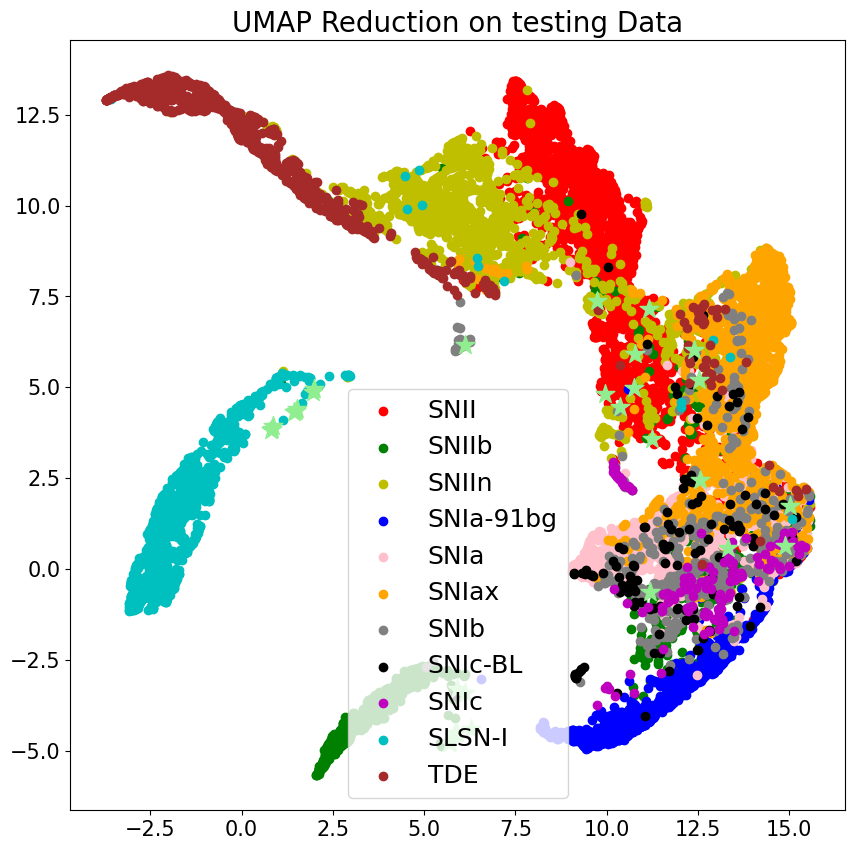

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(11):
    e=[]
    for ind, point in  enumerate(y_test):
        if np.argmax(point) == i:
            e.append(t_embedding[ind])

    e = np.array(e)
    plt.scatter(e[:, 0], e[:, 1], label=ordered_class_names[i], c=color[i])

plt.legend(fontsize=18)
plt.title("UMAP Reduction on testing Data", fontsize=20)

e = t_embedding[len(y_test):len(y_test) + 30]
plt.scatter(e[:, 0], e[:, 1], marker='*', s=200, c='#90EE90')

plt.savefig(f"{figpath}/UMAP_Test")
plt.show()

In [ ]:
def plot_dict(dictionary, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    plt.bar(*zip(*dictionary.items()))
    plt.xticks(list(dictionary.keys()), rotation=90, fontsize=2)

In [ ]:
from sklearn.ensemble import IsolationForest

# ISOLATION FOREST FOR EACH CLASS (SIF)

iso_forests = []

full_latent_data = [[] for i in range(11)]

for i in range(len(X_train)):
    full_latent_data[np.argmax(y_train[i])].append(train_predictions[i])

for i in range(11):
    iso_forests.append(IsolationForest(random_state=0, max_samples = 'auto', n_estimators=200).fit(np.array(full_latent_data[i])))

def get_anomaly_sif(observations):
  return [-det.decision_function(observations) for det in iso_forests]

In [ ]:
# Get anomaly scores

majority_scores = [-det.decision_function(latent_observations_majority) for det in iso_forests]
minority_scores = [-det.decision_function(latent_observations_minority) for det in iso_forests]

majority_scores = np.array(majority_scores)
majority_scores = majority_scores.T

minority_scores = np.array(minority_scores)
minority_scores = minority_scores.T

train_scores = [-det.decision_function(train_predictions) for det in iso_forests]
train_scores = np.array(train_scores)
train_scores = train_scores.T

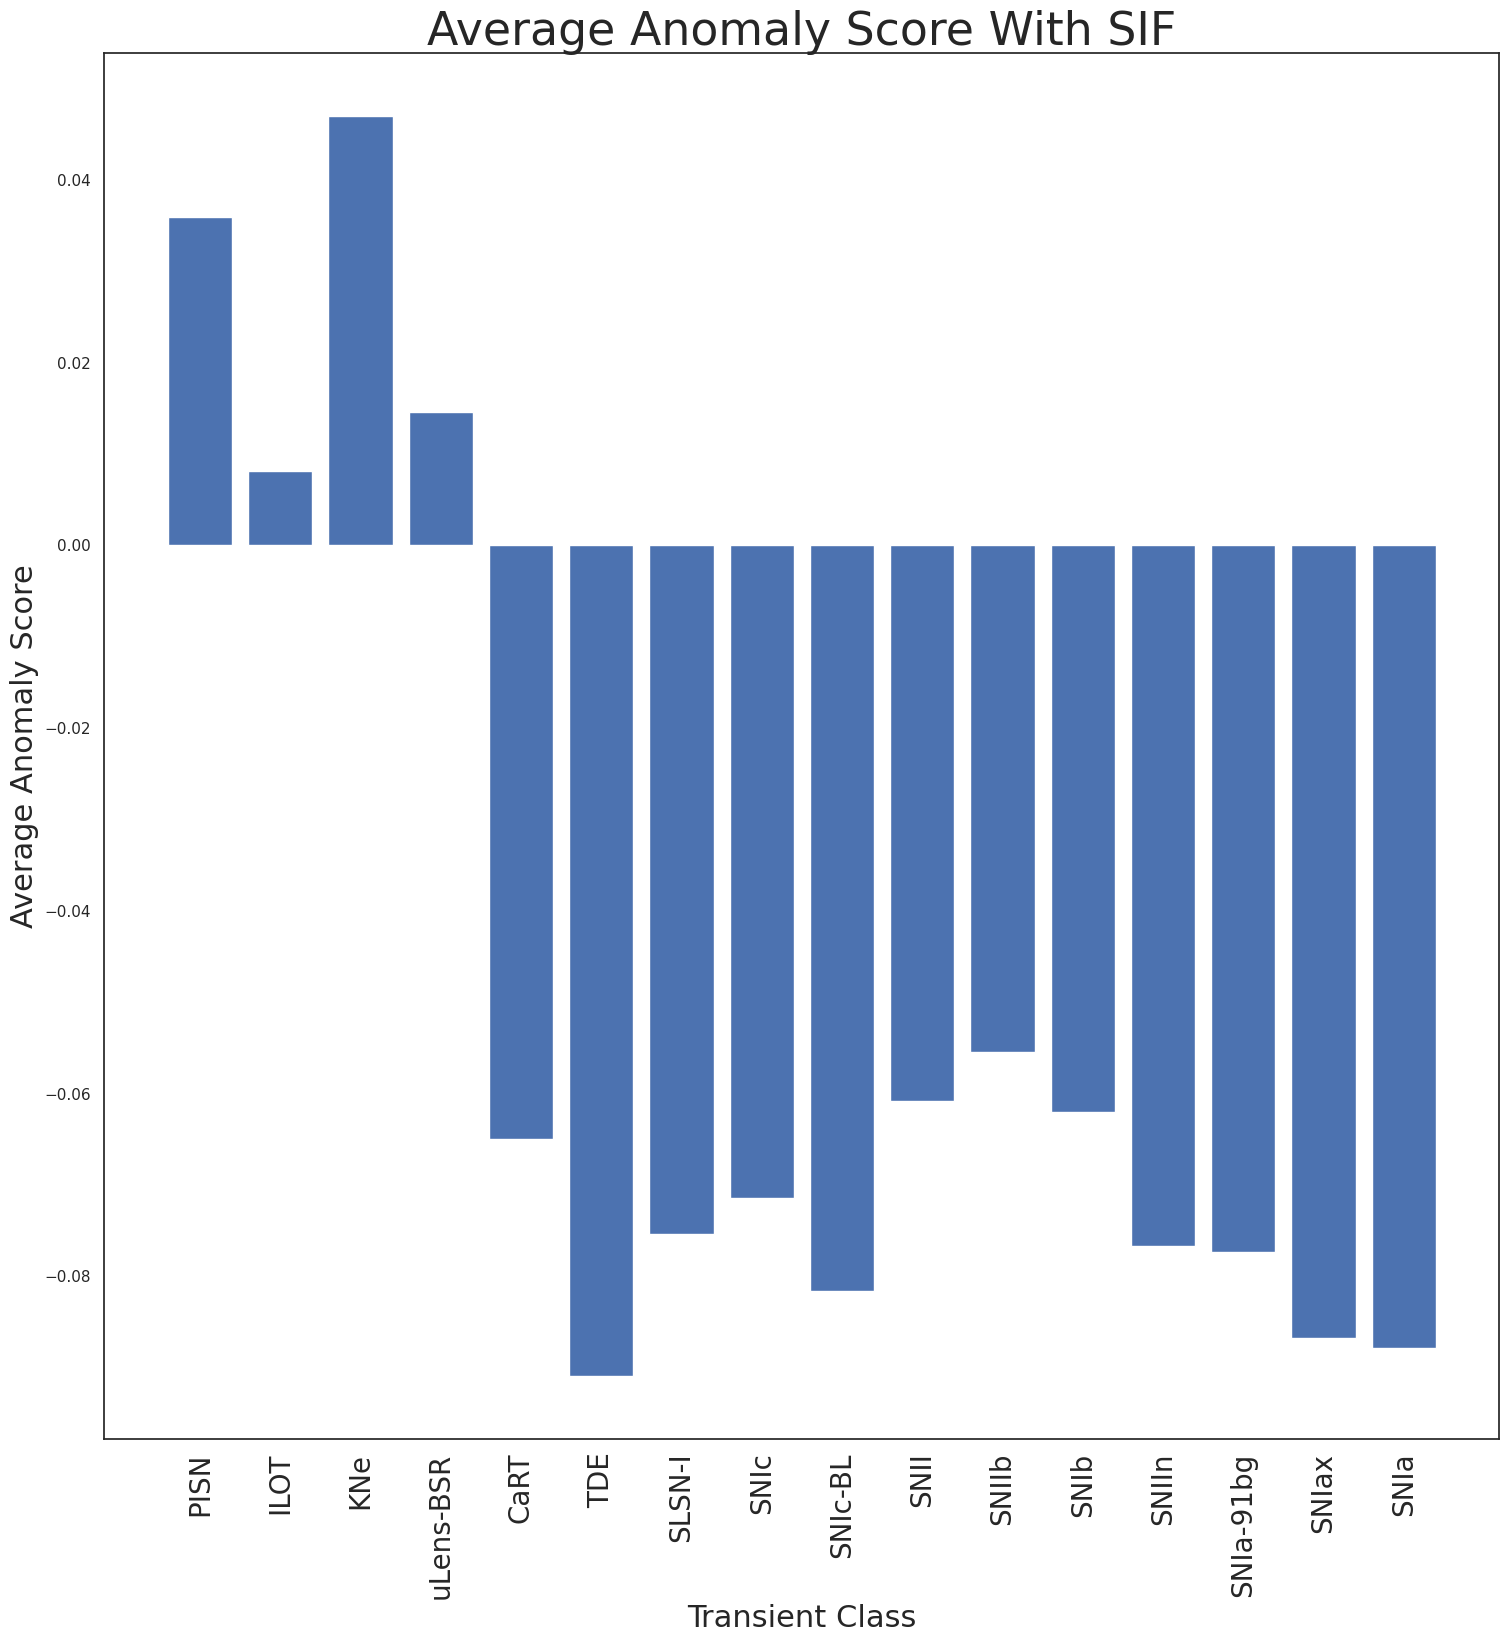

In [ ]:
# Average Score plot


total_counts = {i : 0 for i in file_to_class.values()}
average_score = {i : 0 for i in file_to_class.values()}


for i in range(len(y_test)):

    total_counts[file_to_class[non_anom_classes[np.argmax(y_test[i])]]] += 1
    average_score[file_to_class[non_anom_classes[np.argmax(y_test[i])]]] += np.min(majority_scores[i])

for i in range(len(minority_scores)):
    total_counts[file_to_class[y_data_anom[i]]] += 1
    average_score[file_to_class[y_data_anom[i]]] += np.min(minority_scores[i]) # anomaly score is the minimum

for key in total_counts.keys():
    if (total_counts[key] == 0):
        continue
    average_score[key] /= total_counts[key]



plot_dict(average_score, figsize=(18, 18))

plt.xlabel("Transient Class", fontsize=22)
plt.ylabel("Average Anomaly Score", fontsize=22)
plt.title('Average Anomaly Score With SIF', fontsize=33)

plt.savefig(f"{figpath}/AverageScoreIndividual")

In [ ]:
# Real Tiem Classification

def get_anomaly_real_time(curve, host_gal):

    cur = []
    anomaly_scores = []
    host_gal = np.array([host_gal])
    for i in curve:
        if (np.count_nonzero(i) == 0):
            break
        cur.append(i)
        lc = np.pad(cur, ((0, ntimesteps - len(cur)), (0, 0)))
        lc = np.array([lc])


        anomaly_scores.append(np.min(get_anomaly_sif(latent_model.predict([np.array(lc), np.array(host_gal)]))[0]))


    return anomaly_scores

def plot_real_time(classification_scores, curve, class_):
    cur = np.array([(j[1] * 100) - 30 for j in curve])
    cur = cur[:len(classification_scores)]

    r_band = []
    rer = []
    r_cur = []
    g_band = []
    ger = []
    g_cur = []

    for i in curve[:len(classification_scores)]:
        if (i[0] < 0.5):
            r_band.append(i[2])
            rer.append(i[3])
            r_cur.append((i[1] * 100) - 30)

        else:
            g_band.append(i[2])
            ger.append(i[3])
            g_cur.append((i[1] * 100) - 30)





    fig, axs = plt.subplots(2, figsize=(8, 16))

    plt.subplots_adjust(wspace=0, hspace=0)

    axs[0].set_title(f"Real Time Anomaly Score for a {class_}", fontsize=25)


    axs[0].set_ylabel('Scaled Flux', fontsize=20)
    axs[0].errorbar(r_cur, r_band, yerr=rer, fmt='.')
    axs[0].errorbar(g_cur, g_band, yerr = ger, fmt = '.')


    axs[1].set_ylabel('Anomaly Score', fontsize=20)
    axs[1].set_xlabel('Time Since Trigger', fontsize=20)
    axs[1].plot(cur, classification_scores)

    axs[1].set_ylim(-0.2, 0.2)

    axs[1].axhline(0.05, linestyle='--', color='r')

    axs[1].legend()
    plt.show()

    fig.savefig(f"{figpath}/Anomaly{class_}Example")

1/1 [==============================] - 0s 112ms/step


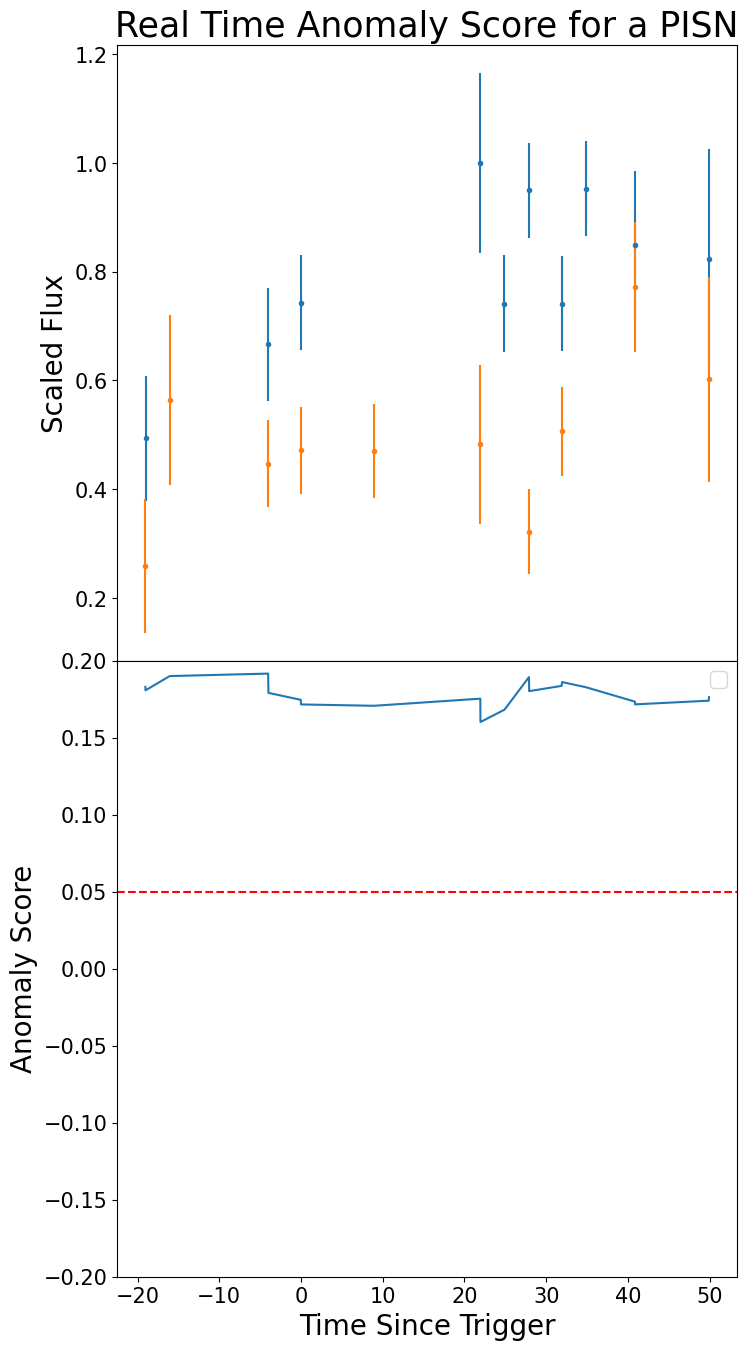

1/1 [==============================] - 0s 121ms/step


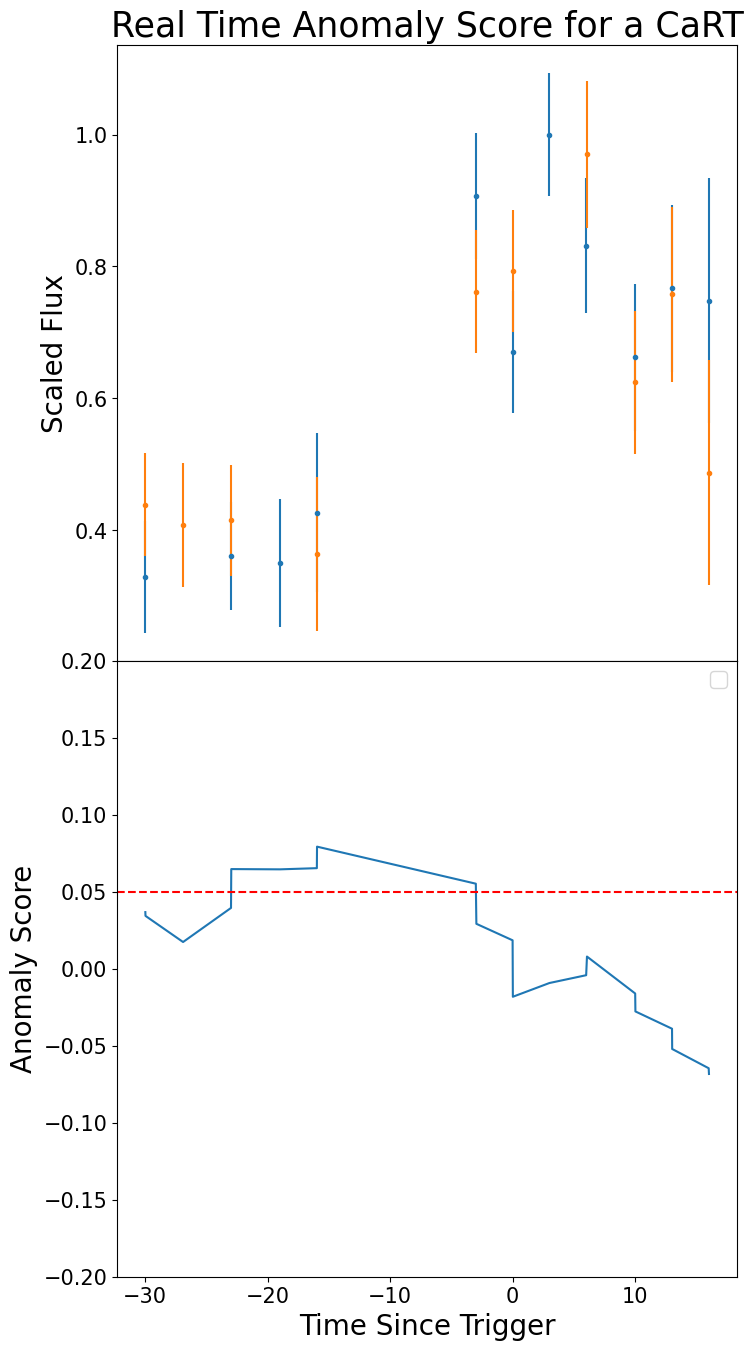

1/1 [==============================] - 0s 116ms/step


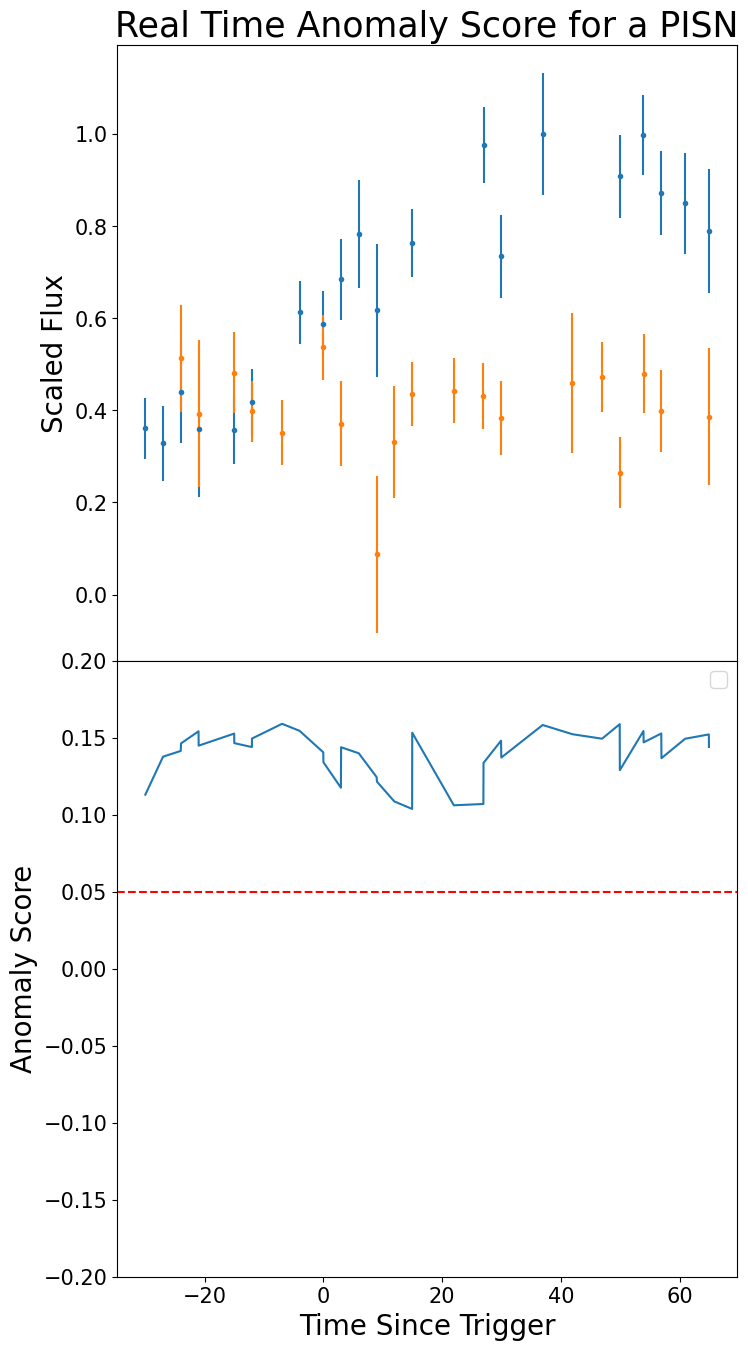

1/1 [==============================] - 0s 122ms/step


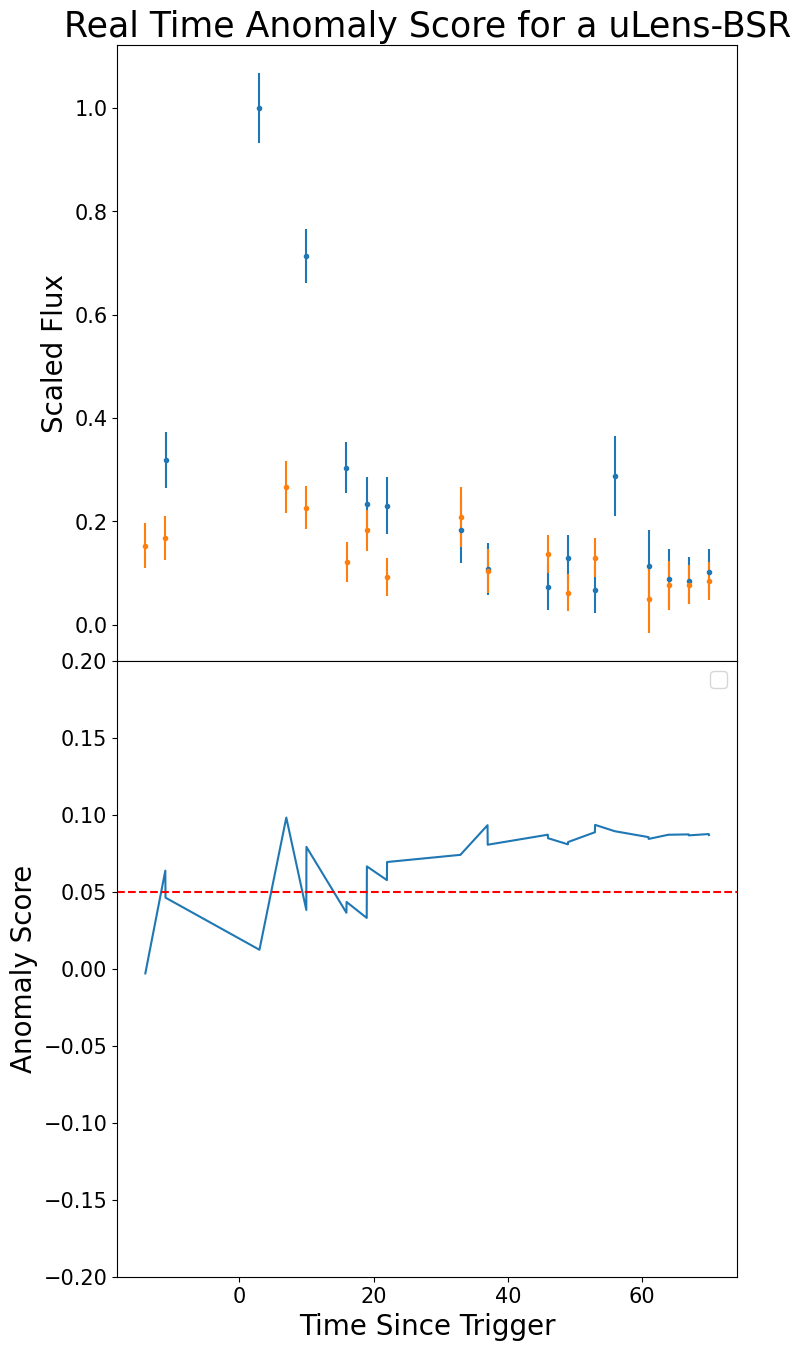

1/1 [==============================] - 0s 127ms/step


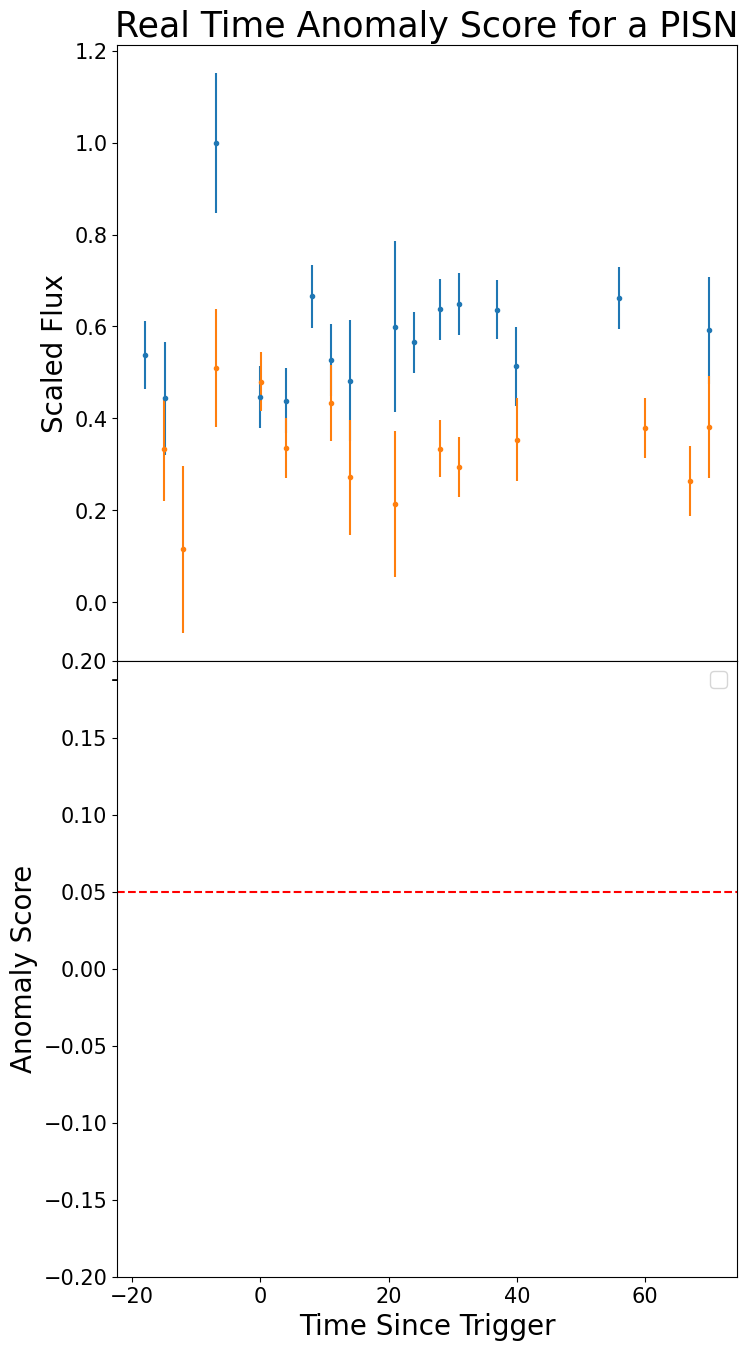

In [ ]:
import random
import matplotlib
font = {'size'   : 15}

matplotlib.rc('font', **font)

for _ in range(5):

    i = random.randint(1, len(x_data_anom))

    plot_real_time(get_anomaly_real_time(x_data_anom[i], host_gal_anom[i]), x_data_anom[i], file_to_class[y_data_anom[i]])

1/1 [==============================] - 0s 124ms/step


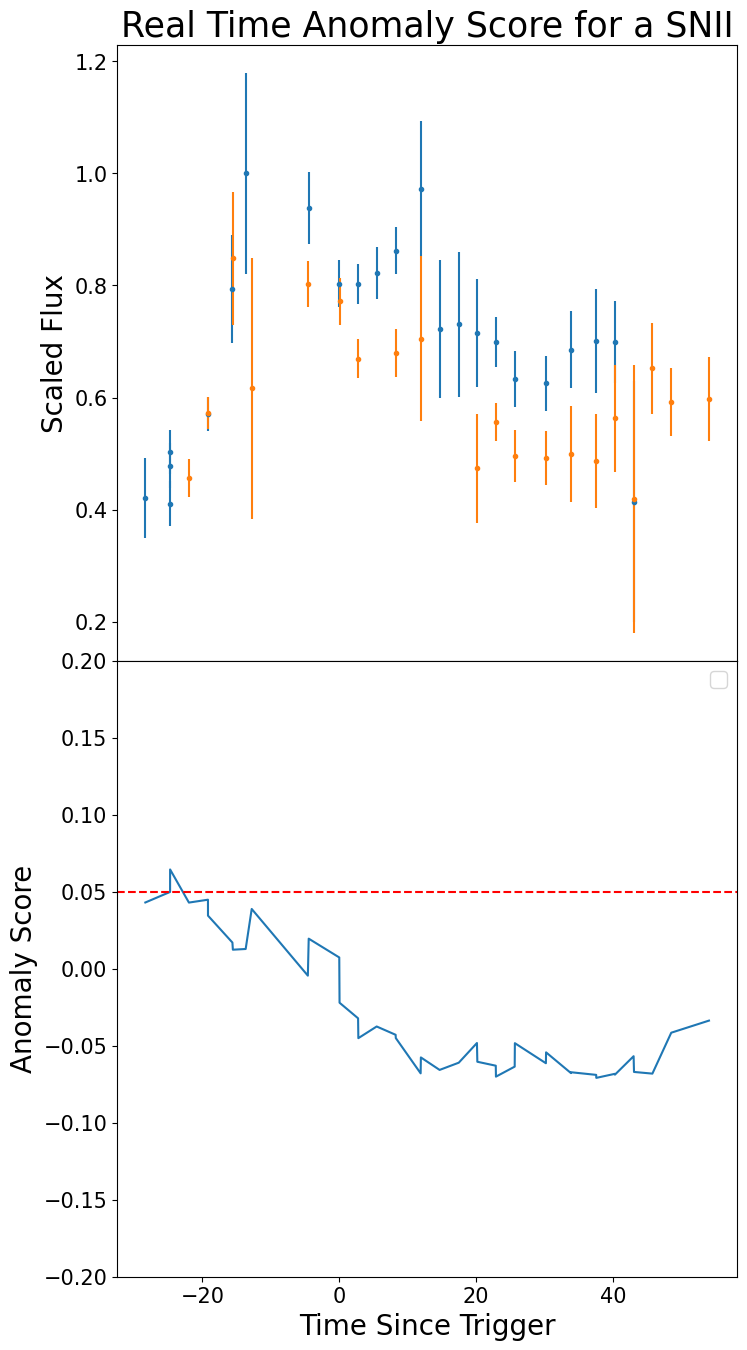

1/1 [==============================] - 0s 120ms/step


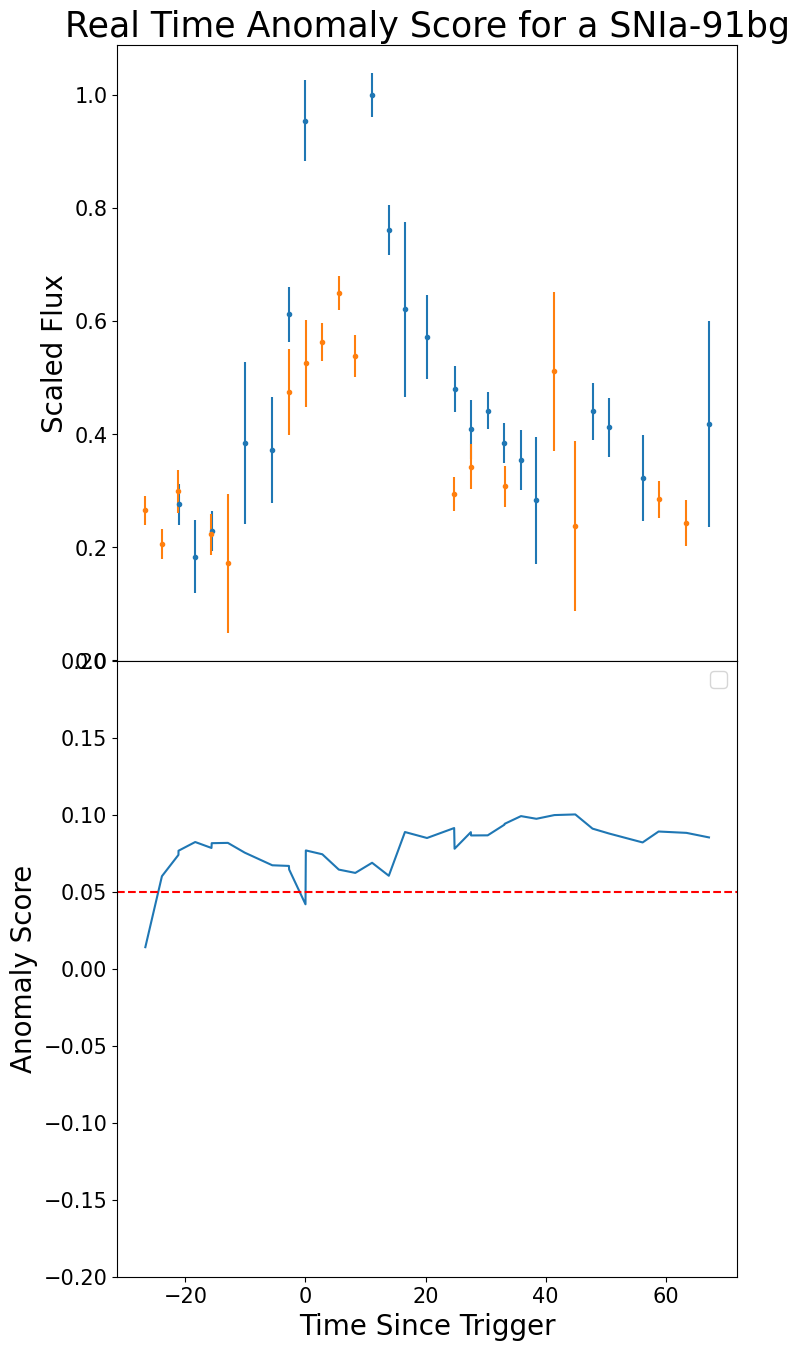

1/1 [==============================] - 0s 115ms/step


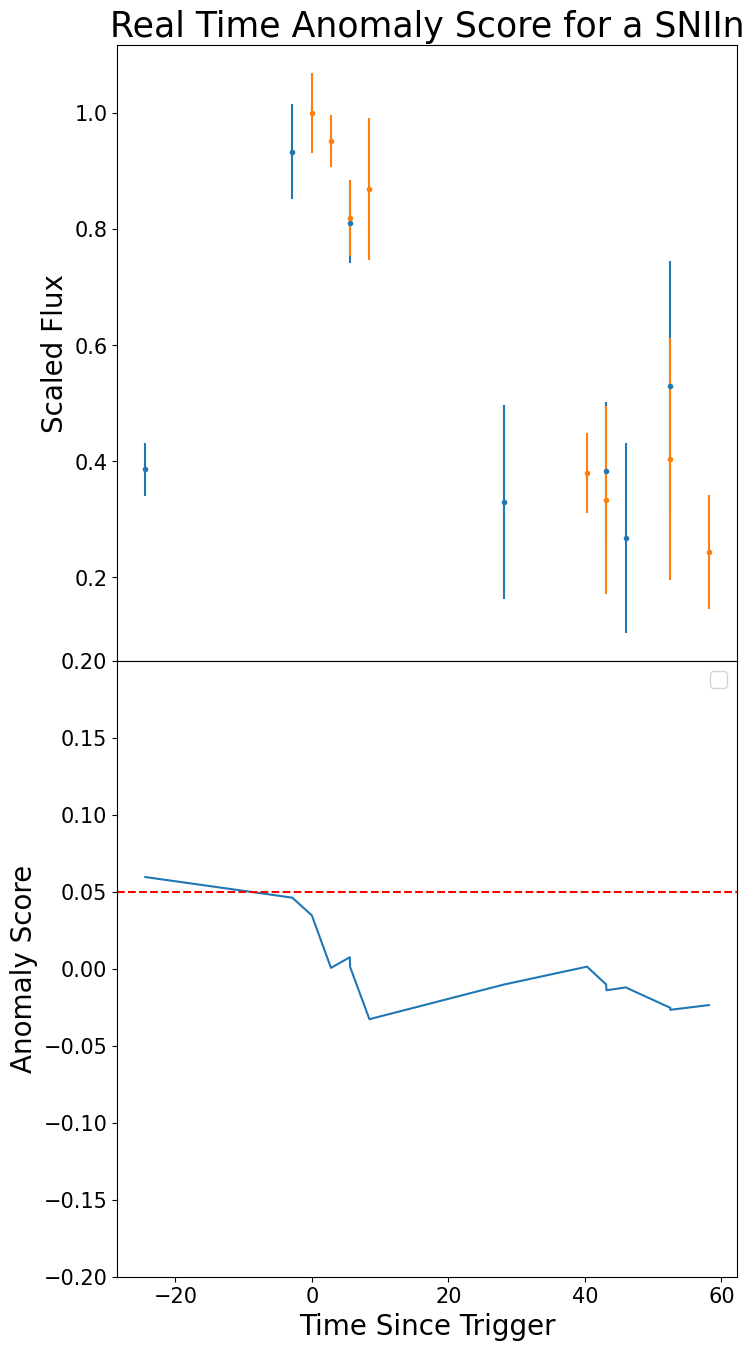

1/1 [==============================] - 0s 111ms/step


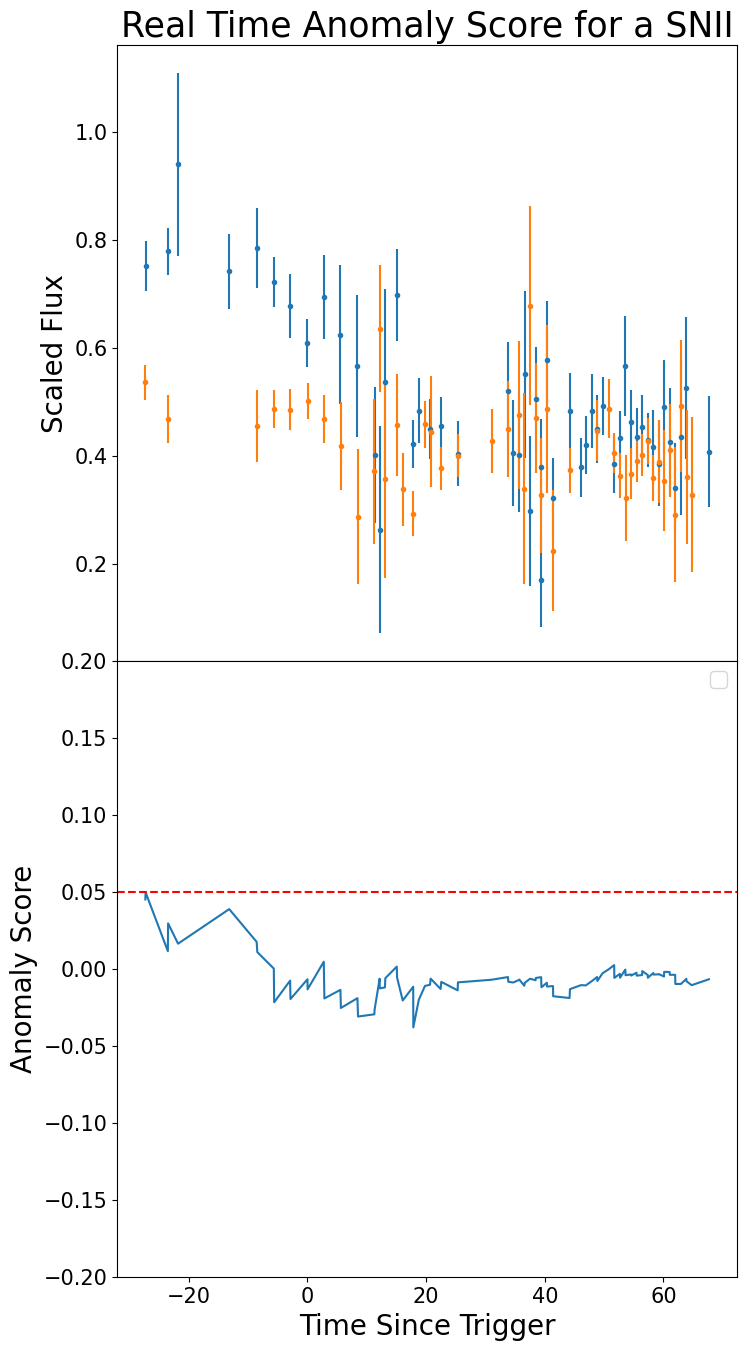

1/1 [==============================] - 0s 115ms/step


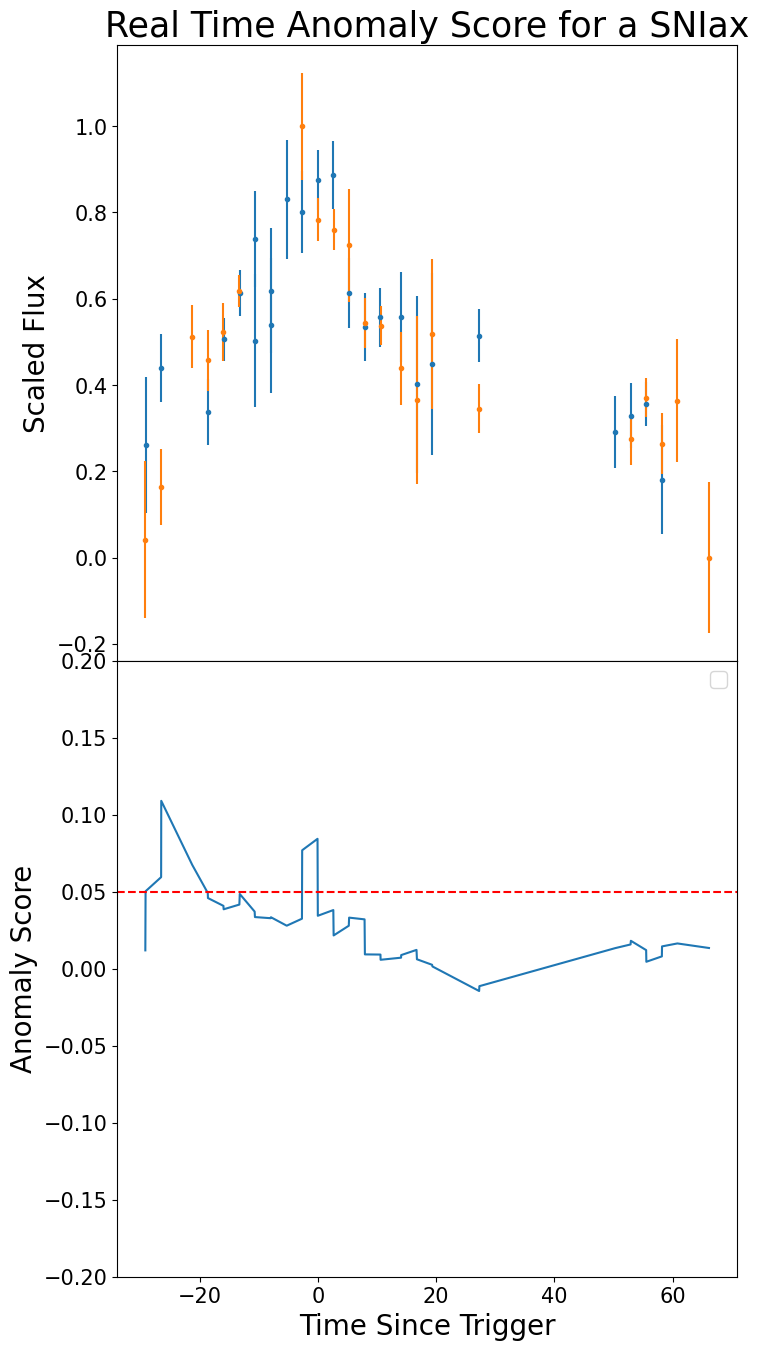

In [ ]:

for _ in range(5):
    i = random.randint(1, len(X_test))

    plot_real_time(get_anomaly_real_time(X_test[i], host_gal_test[i]), X_test[i], ordered_class_names[np.argmax(y_test[i])])




In [ ]:
mult_iso_maj = [np.min(i) for i in majority_scores]
mult_iso_min = [np.min(i) for i in minority_scores]

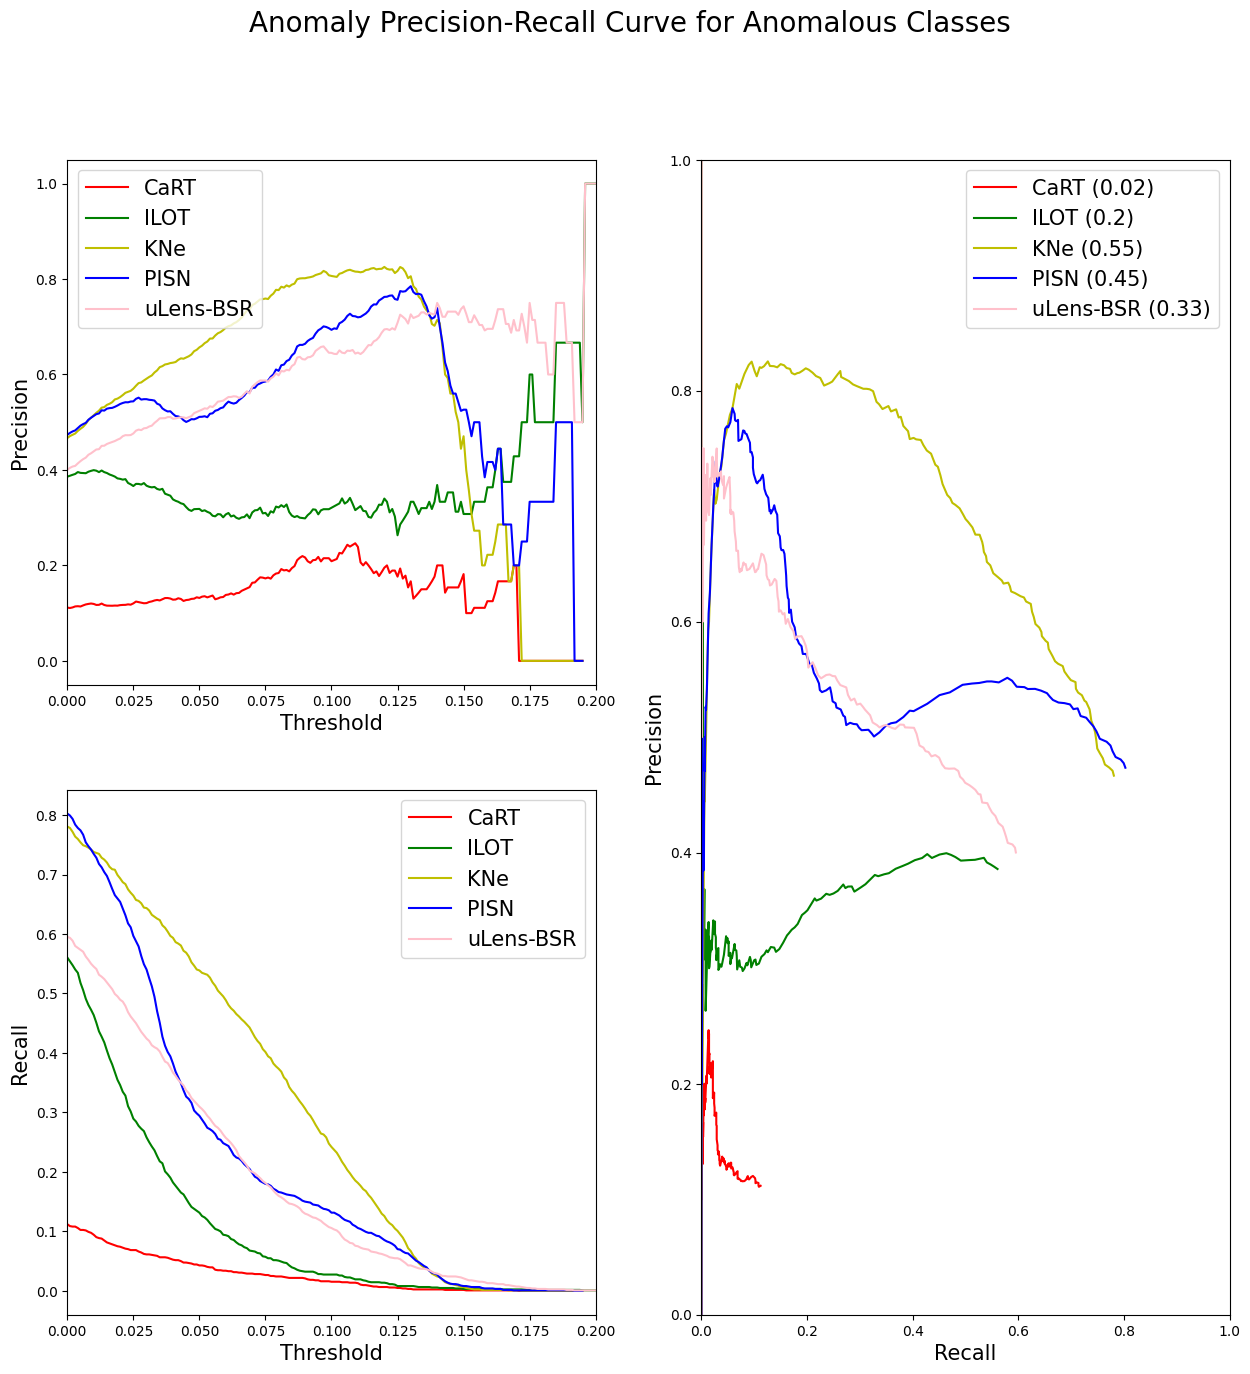

In [ ]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt

# Gets precision recall values assuming one anom class vs. all the majority classes and that anom class has 10x less samples than the majority class

fig = plt.figure(figsize=(15, 15))

ax3 = fig.add_subplot(221)  # add subplot into first position in a 2x2 grid (upper left)
ax2 = fig.add_subplot(223, sharex=ax3)  # add to third position in 2x2 grid (lower left) and sharex with ax11
ax = fig.add_subplot(122)

def get_pr(minority, majority):

    precision = []
    recall = []
    thresholds = []
    for threshold in np.arange(0, max(np.max(majority), np.max(minority)), 0.001):
        ta = np.count_nonzero(minority > threshold)
        fa = np.count_nonzero(majority > threshold)
        tn = np.count_nonzero(majority < threshold)
        fn = np.count_nonzero(minority < threshold)
        if (ta + fa == 0):
            continue
        recall.append(ta / (ta + fn))
        precision.append(ta / (ta + fa))
        thresholds.append(threshold)
    return thresholds, precision, recall

plt.ylim((0, 1))
plt.xlim((0, 1))

for ind, i in enumerate(anom_classes):
    mult_iso_min_class = [mult_iso_min[t] for t in range(len(mult_iso_min)) if y_data_anom[t] == i]

    mult_iso_min_class = mult_iso_min_class[:int(min(len(mult_iso_maj)/10, len(mult_iso_min_class)))]

    thresholds, precision, recall = get_pr(mult_iso_min_class, mult_iso_maj)

    ax.plot(recall, precision, label=f"{file_to_class[i]} ({round(auc(recall, precision), 2)})", c = color[ind])

    ax2.plot(thresholds, recall, label=f"{file_to_class[i]}", c = color[ind])

    ax3.plot(thresholds, precision, label=f"{file_to_class[i]}", c = color[ind])

ax3.set_xlim(0, 0.2)
# ax2.set_ylim(0, 0.2)

ax.set_ylabel("Precision", fontsize=15)
ax.set_xlabel("Recall", fontsize=15)
ax.legend(fontsize=15)

ax2.set_ylabel("Recall", fontsize=15)
ax2.set_xlabel("Threshold", fontsize=15)
ax2.legend(fontsize=15)

ax3.set_ylabel("Precision", fontsize=15)
ax3.set_xlabel("Threshold", fontsize=15)
ax3.legend(fontsize=15)

fig.suptitle("Anomaly Precision-Recall Curve for Anomalous Classes", fontsize=20)



plt.savefig(f"{figpath}/PRAnomClassTesting")


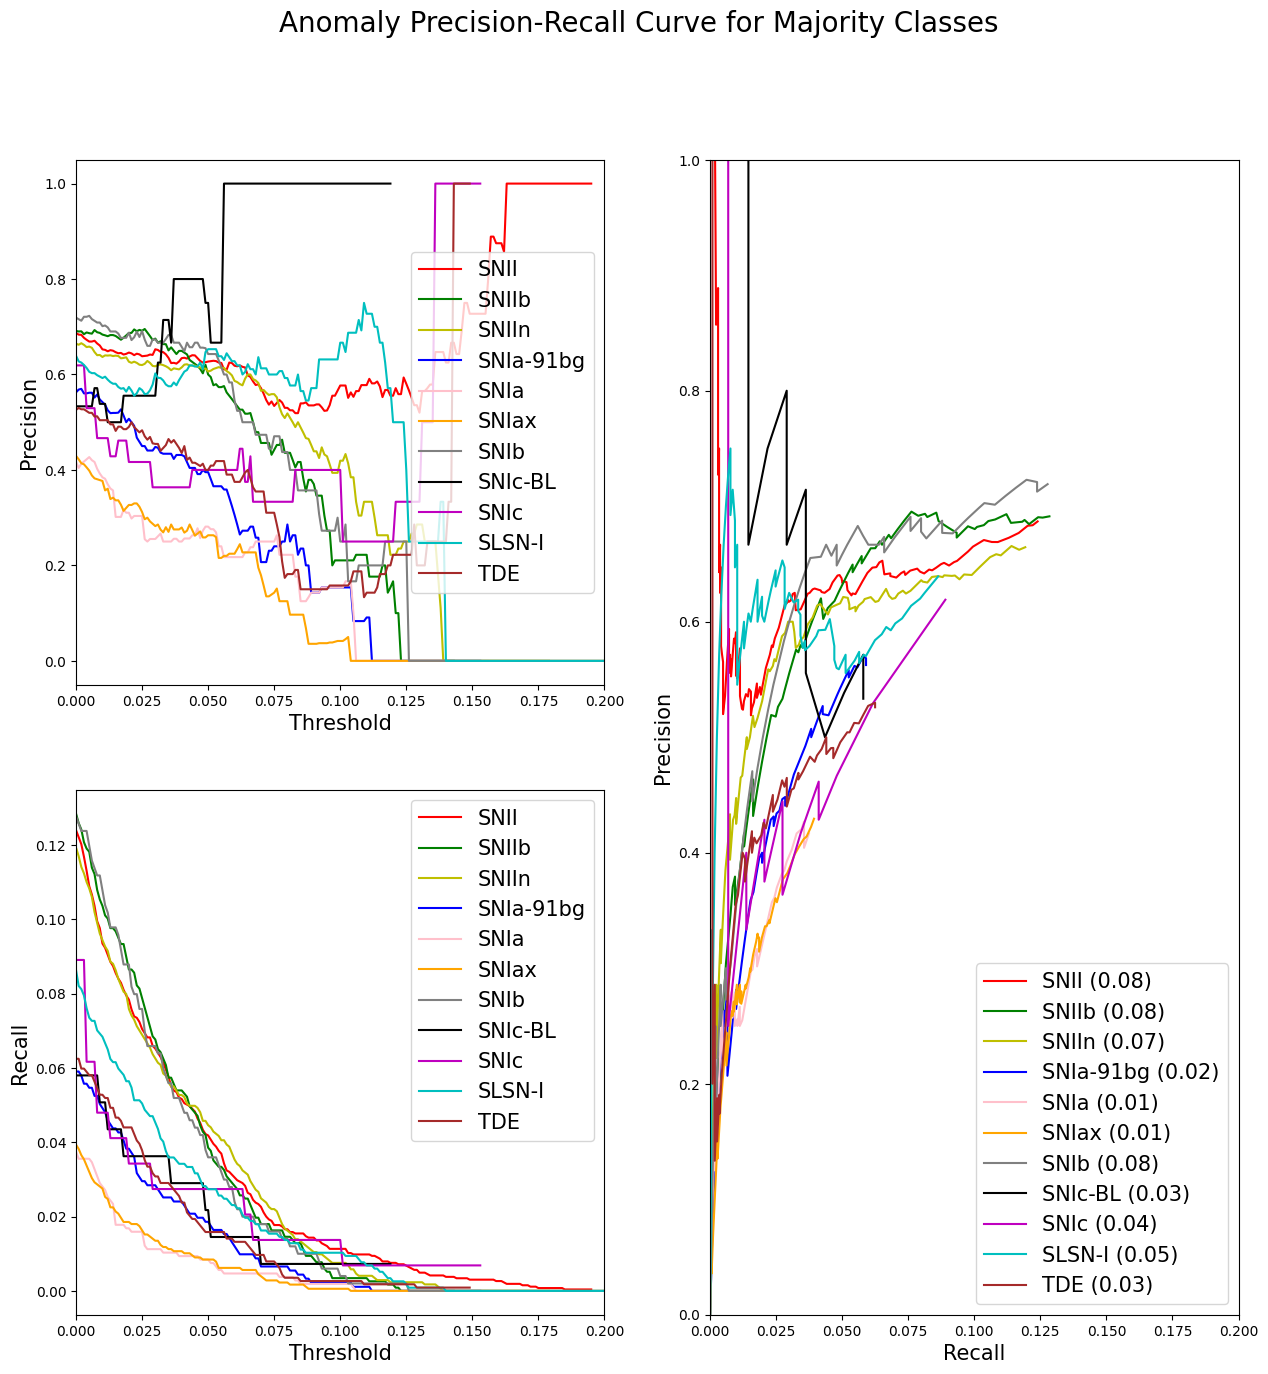

In [ ]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt

# Gets precision recall values assuming one anom class vs. all the majority classes and that anom class has 10x less samples than the majority class

fig = plt.figure(figsize=(15, 15))

ax3 = fig.add_subplot(221)  # add subplot into first position in a 2x2 grid (upper left)
ax2 = fig.add_subplot(223, sharex=ax3)  # add to third position in 2x2 grid (lower left) and sharex with ax11
ax = fig.add_subplot(122)

plt.ylim((0, 1))
plt.xlim((0, 1))

for ind, i in enumerate(non_anom_classes):

    mult_iso_maj_class = [mult_iso_maj[t] for t in range(len(mult_iso_maj)) if non_anom_classes[np.argmax(y_test[t])] == i]

    mult_iso_min_cur = random.sample(mult_iso_min, int(len(mult_iso_maj_class)/10))

    thresholds, precision, recall = get_pr(mult_iso_maj_class, mult_iso_min_cur)

    ax.plot(recall, precision, label=f"{file_to_class[i]} ({round(auc(recall, precision), 2)})", c = color[ind])

    ax2.plot(thresholds, recall, label=f"{file_to_class[i]}", c = color[ind])

    ax3.plot(thresholds, precision, label=f"{file_to_class[i]}", c = color[ind])

ax3.set_xlim(0, 0.2)
ax.set_xlim(0, 0.2)

ax.set_ylabel("Precision", fontsize=15)
ax.set_xlabel("Recall", fontsize=15)
ax.legend(fontsize=15)

ax2.set_ylabel("Recall", fontsize=15)
ax2.set_xlabel("Threshold", fontsize=15)
ax2.legend(fontsize=15)

ax3.set_ylabel("Precision", fontsize=15)
ax3.set_xlabel("Threshold", fontsize=15)
ax3.legend(fontsize=15)

fig.suptitle("Anomaly Precision-Recall Curve for Majority Classes", fontsize=20)

plt.savefig(f"{figpath}/PRNonAnomClassTesting")


In [ ]:
random_sample = np.append(mult_iso_maj, random.sample(mult_iso_min, int(len(mult_iso_maj))/10))

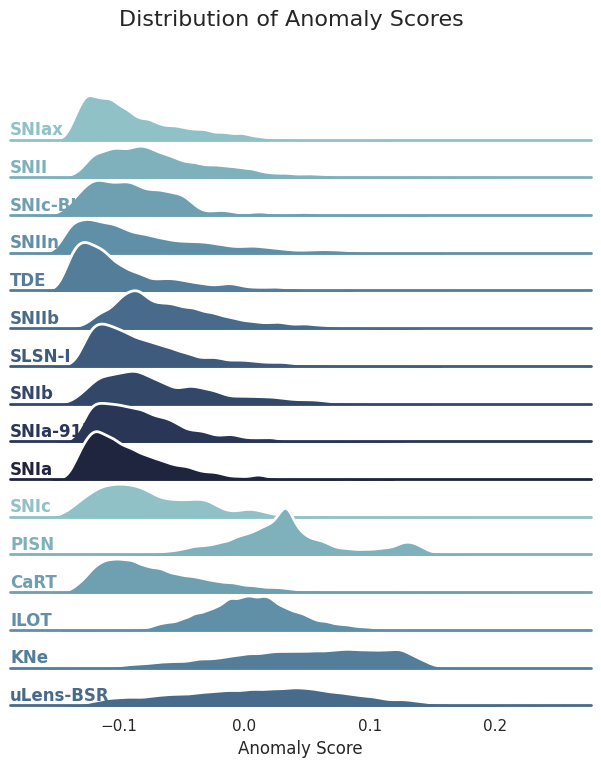

In [ ]:
x=[]
g=[]

for i in range(len(mult_iso_maj)):
    g.append(file_to_class[non_anom_classes[np.argmax(y_test[i])]])
    x.append(mult_iso_maj[i])

for i in range(len(mult_iso_min)):
    g.append(file_to_class[y_data_anom[i]])
    x.append(mult_iso_min[i])

df = pd.DataFrame(dict(x=x, g=g))

import seaborn as sns

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.set(xlabel="Anomaly Score")

g.despine(bottom=True, left=True)
g.fig.suptitle('Distribution of Anomaly Scores', fontsize=16)

g.figure.savefig(f"{figpath}/Distribution.png")

In [ ]:
def create_frac_fig(cutoff, percentile, scores, scores_anom, mult_list, ret=False):

    score_count = {i : 0 for i in file_to_class.values()}
    total_counts = {i : 0 for i in file_to_class.values()}

    for i in range(len(scores)):
        total_counts[file_to_class[non_anom_classes[np.argmax(y_test[i])]]]+=1
        if scores[i] < cutoff:
            score_count[file_to_class[non_anom_classes[np.argmax(y_test[i])]]] += 1

    for i in range(len(scores_anom)):
        total_counts[file_to_class[y_data_anom[i]]]+=1
        if scores_anom[i] < cutoff:
            score_count[file_to_class[y_data_anom[i]]]+=1


    sum_ = 0
    for ind, i in enumerate(file_to_class.values()):
        if (i == 'AGN'):
            continue
        score_count[i] /= total_counts[i]

        score_count[i] *= mult_list[ind]

        sum_ += score_count[i]

    for i in total_counts.keys():
        score_count[i] /= sum_

    if (ret):
      return score_count

    plt.figure(figsize=(18, 18))
    plt.bar(*zip(*score_count.items()))
    plt.xticks(list(score_count.keys()), rotation=90, fontsize=18)


    plt.title(f'Precision in {100-percentile}th percentile of scores', fontsize=31)
    plt.xlabel("Class", fontsize=27)
    plt.ylabel("Fraction of Anomalous Group (Precision)", fontsize=27)
    plt.savefig(f'{figpath}/UpdatedScore_{100-percentile}th_10')

    plt.show()




def create_comp_fig(cutoff, percentile, scores, scores_anom, ret=False):

    score_count = {i : 0 for i in file_to_class.values()}

    total_counts = {i : 0 for i in file_to_class.values()}

    for i in range(len(scores)):
        total_counts[file_to_class[non_anom_classes[np.argmax(y_test[i])]]]+=1
        if scores[i] < cutoff:
            score_count[file_to_class[non_anom_classes[np.argmax(y_test[i])]]] += 1

    for i in range(len(scores_anom)):
        total_counts[file_to_class[y_data_anom[i]]]+=1
        if scores_anom[i] < cutoff:
            score_count[file_to_class[y_data_anom[i]]]+=1


    sum_ = 0
    for ind, i in enumerate(total_counts.keys()):
        if (i == 'AGN'):
            continue
        score_count[i] /= total_counts[i]


        sum_ += score_count[i]

    if (ret):
      return score_count

    plt.figure(figsize=(18, 18))
    plt.bar(*zip(*score_count.items()))
    plt.xticks(list(score_count.keys()), rotation=90, fontsize=18)


    plt.title(f'Recall in {100-percentile}th percentile of scores', fontsize=31)
    plt.xlabel("Class", fontsize=27)
    plt.ylabel("Fraction of Total Class (Recall)", fontsize=27)
    plt.savefig(f'{figpath}/UpdatedScore_{100-percentile}th')

    plt.show()

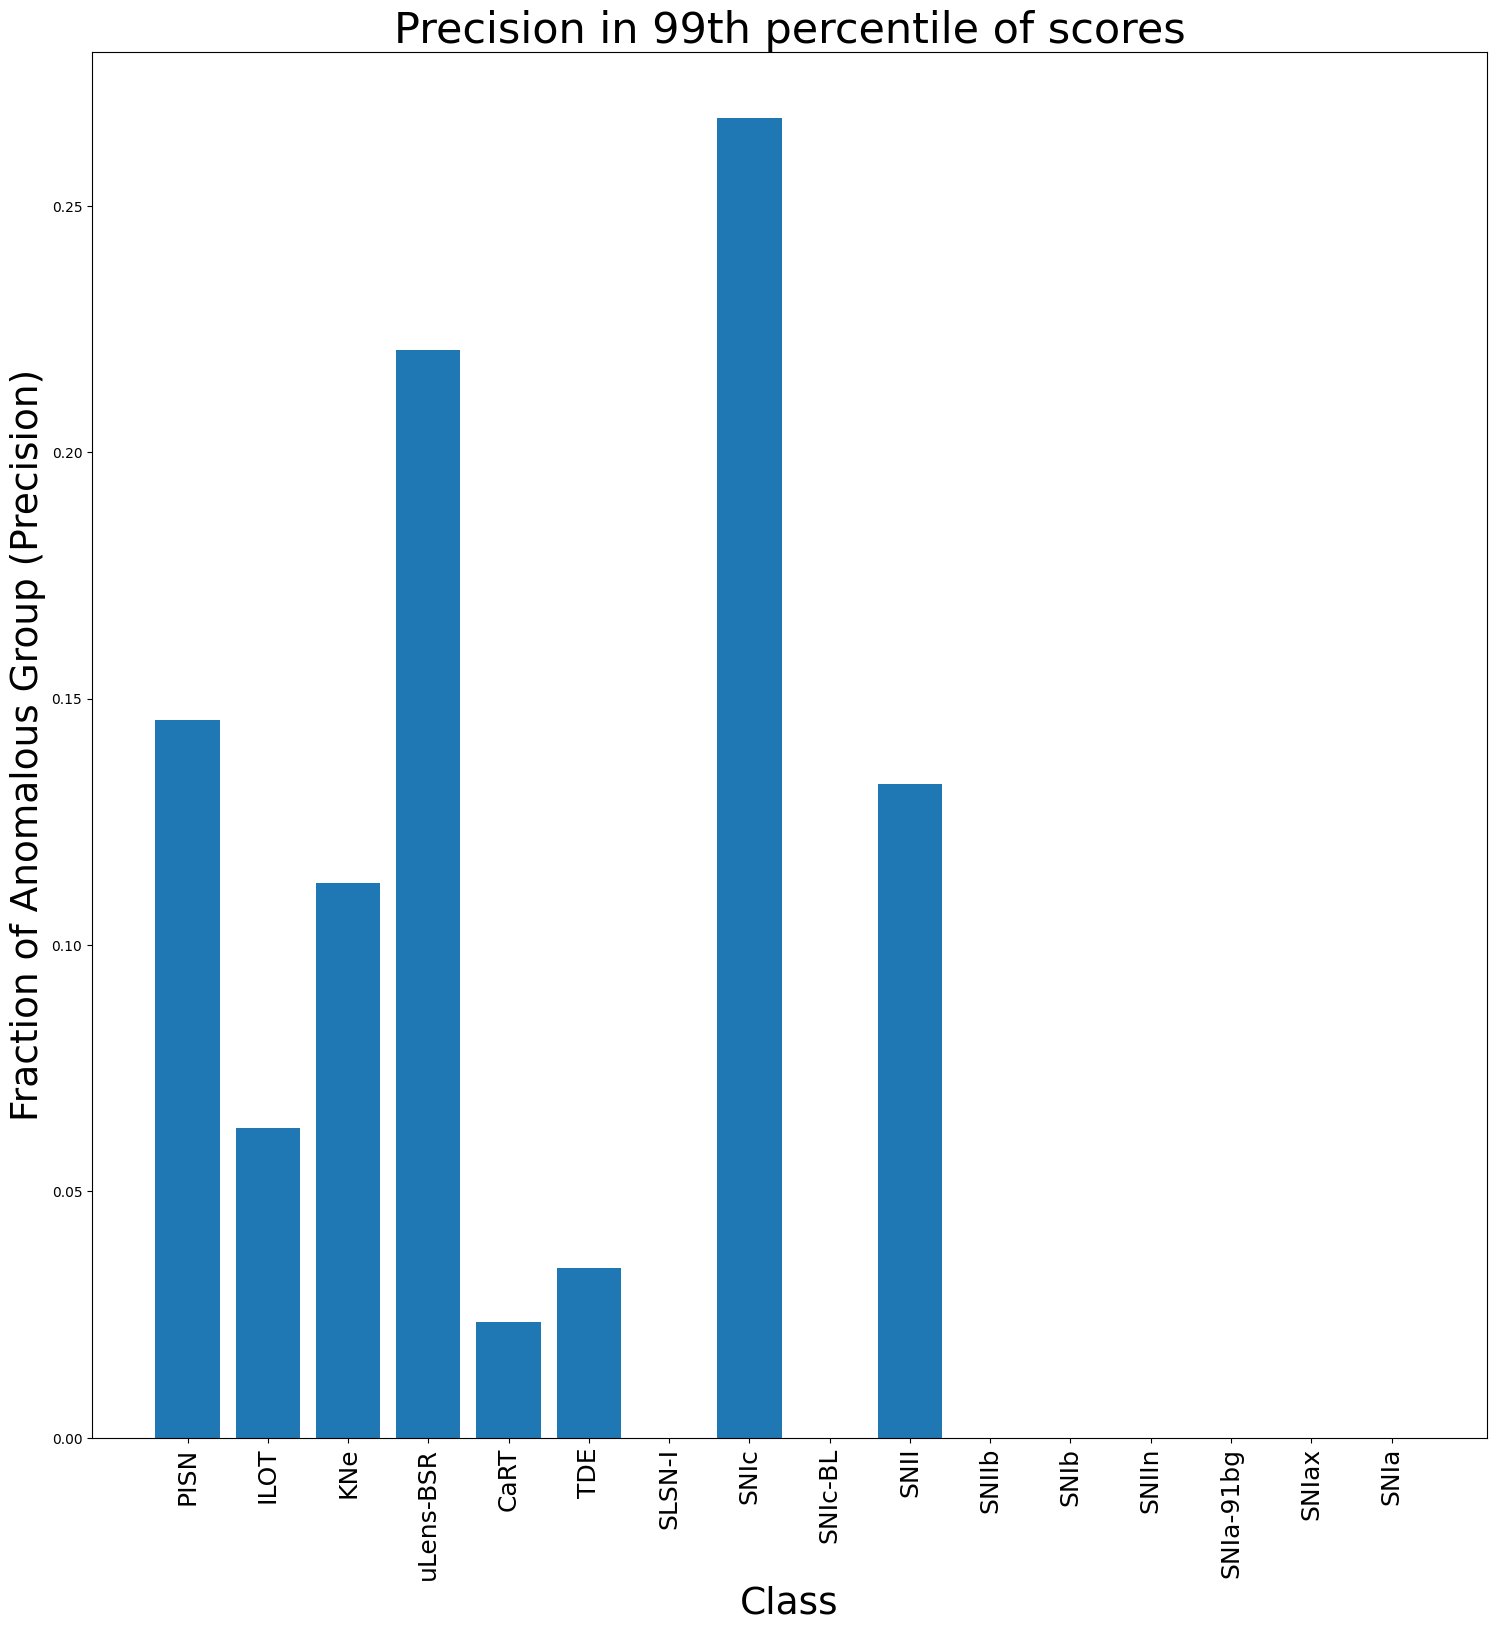

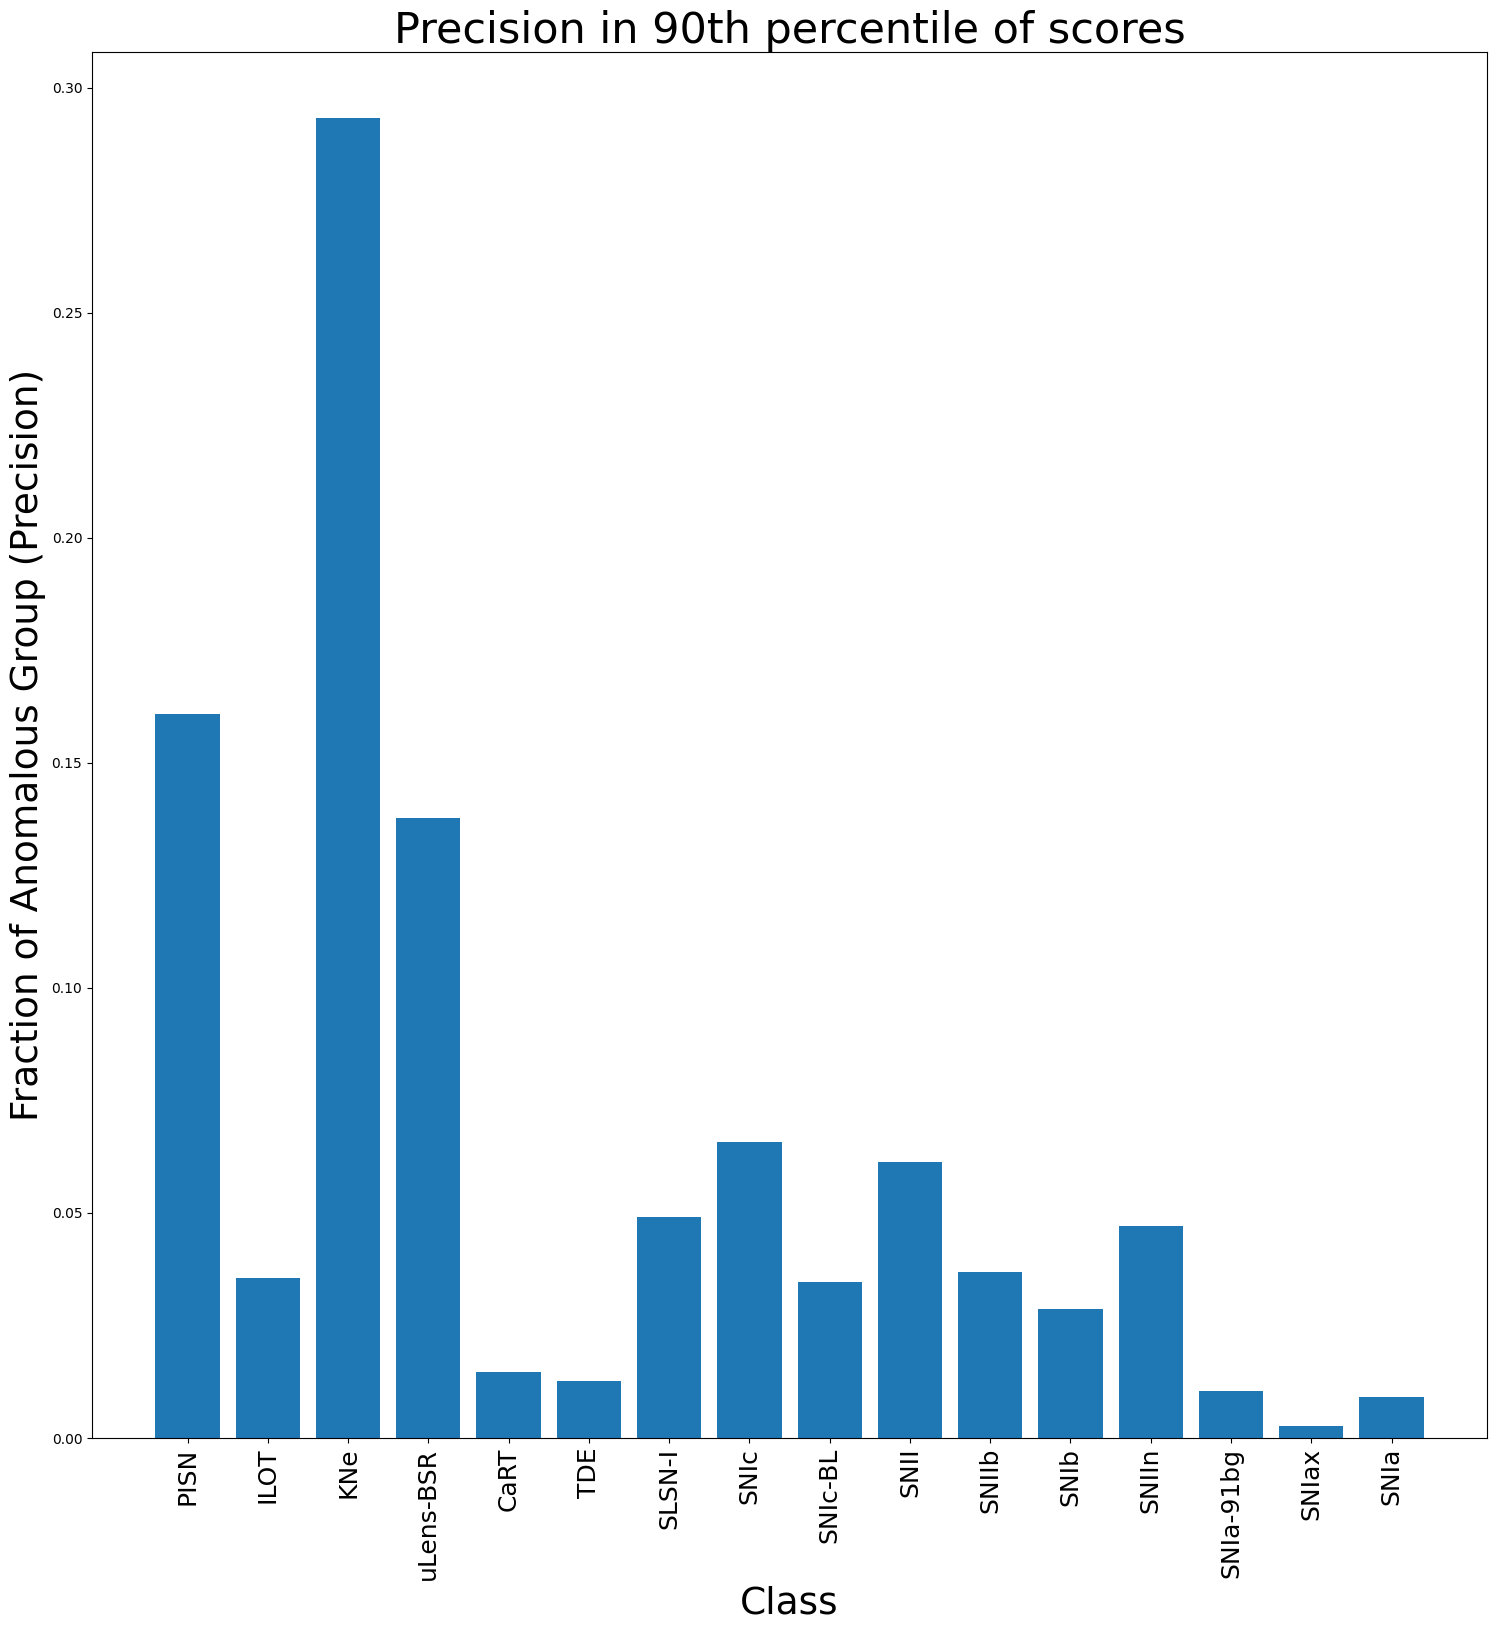

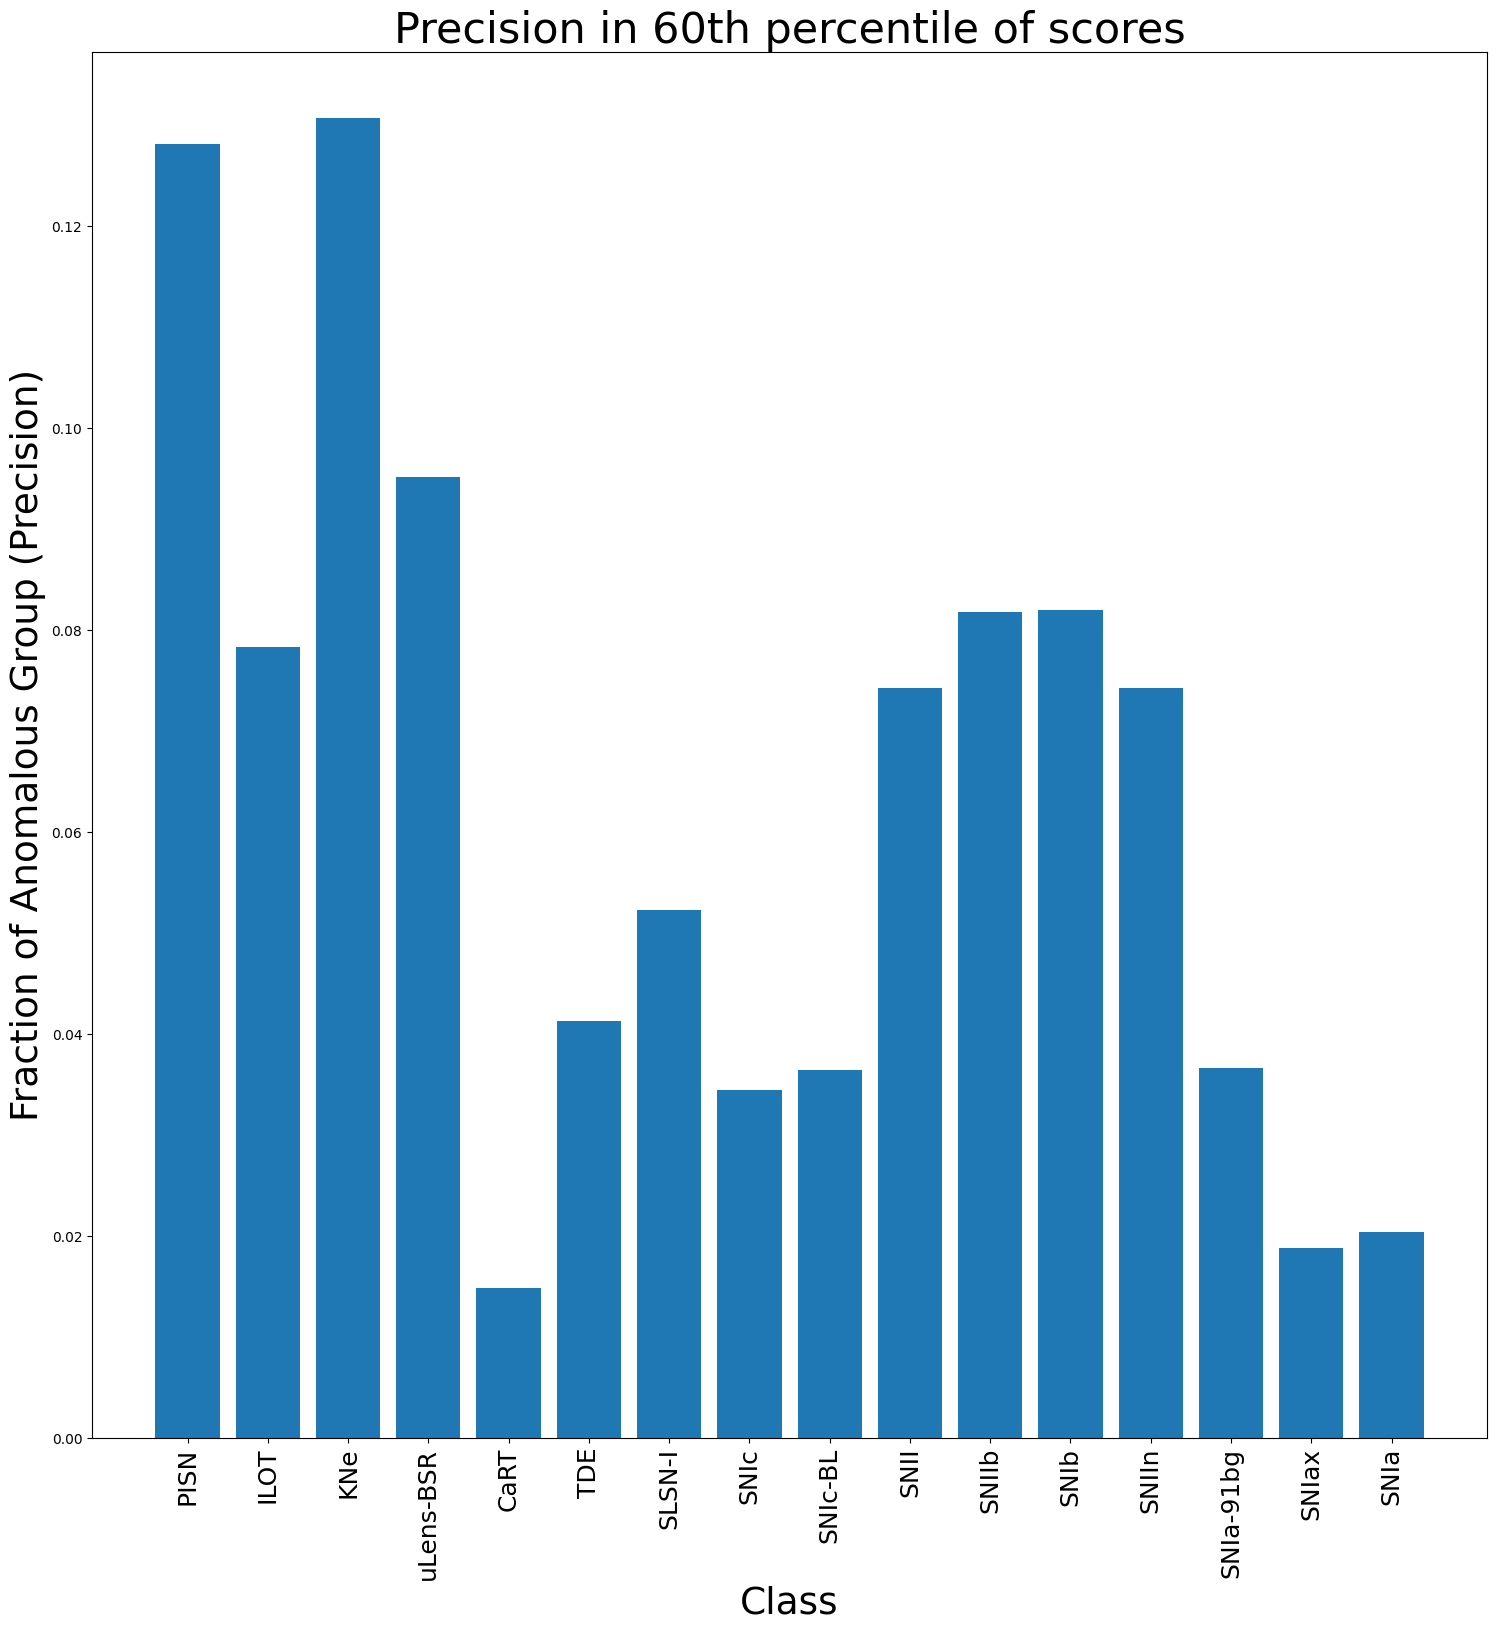

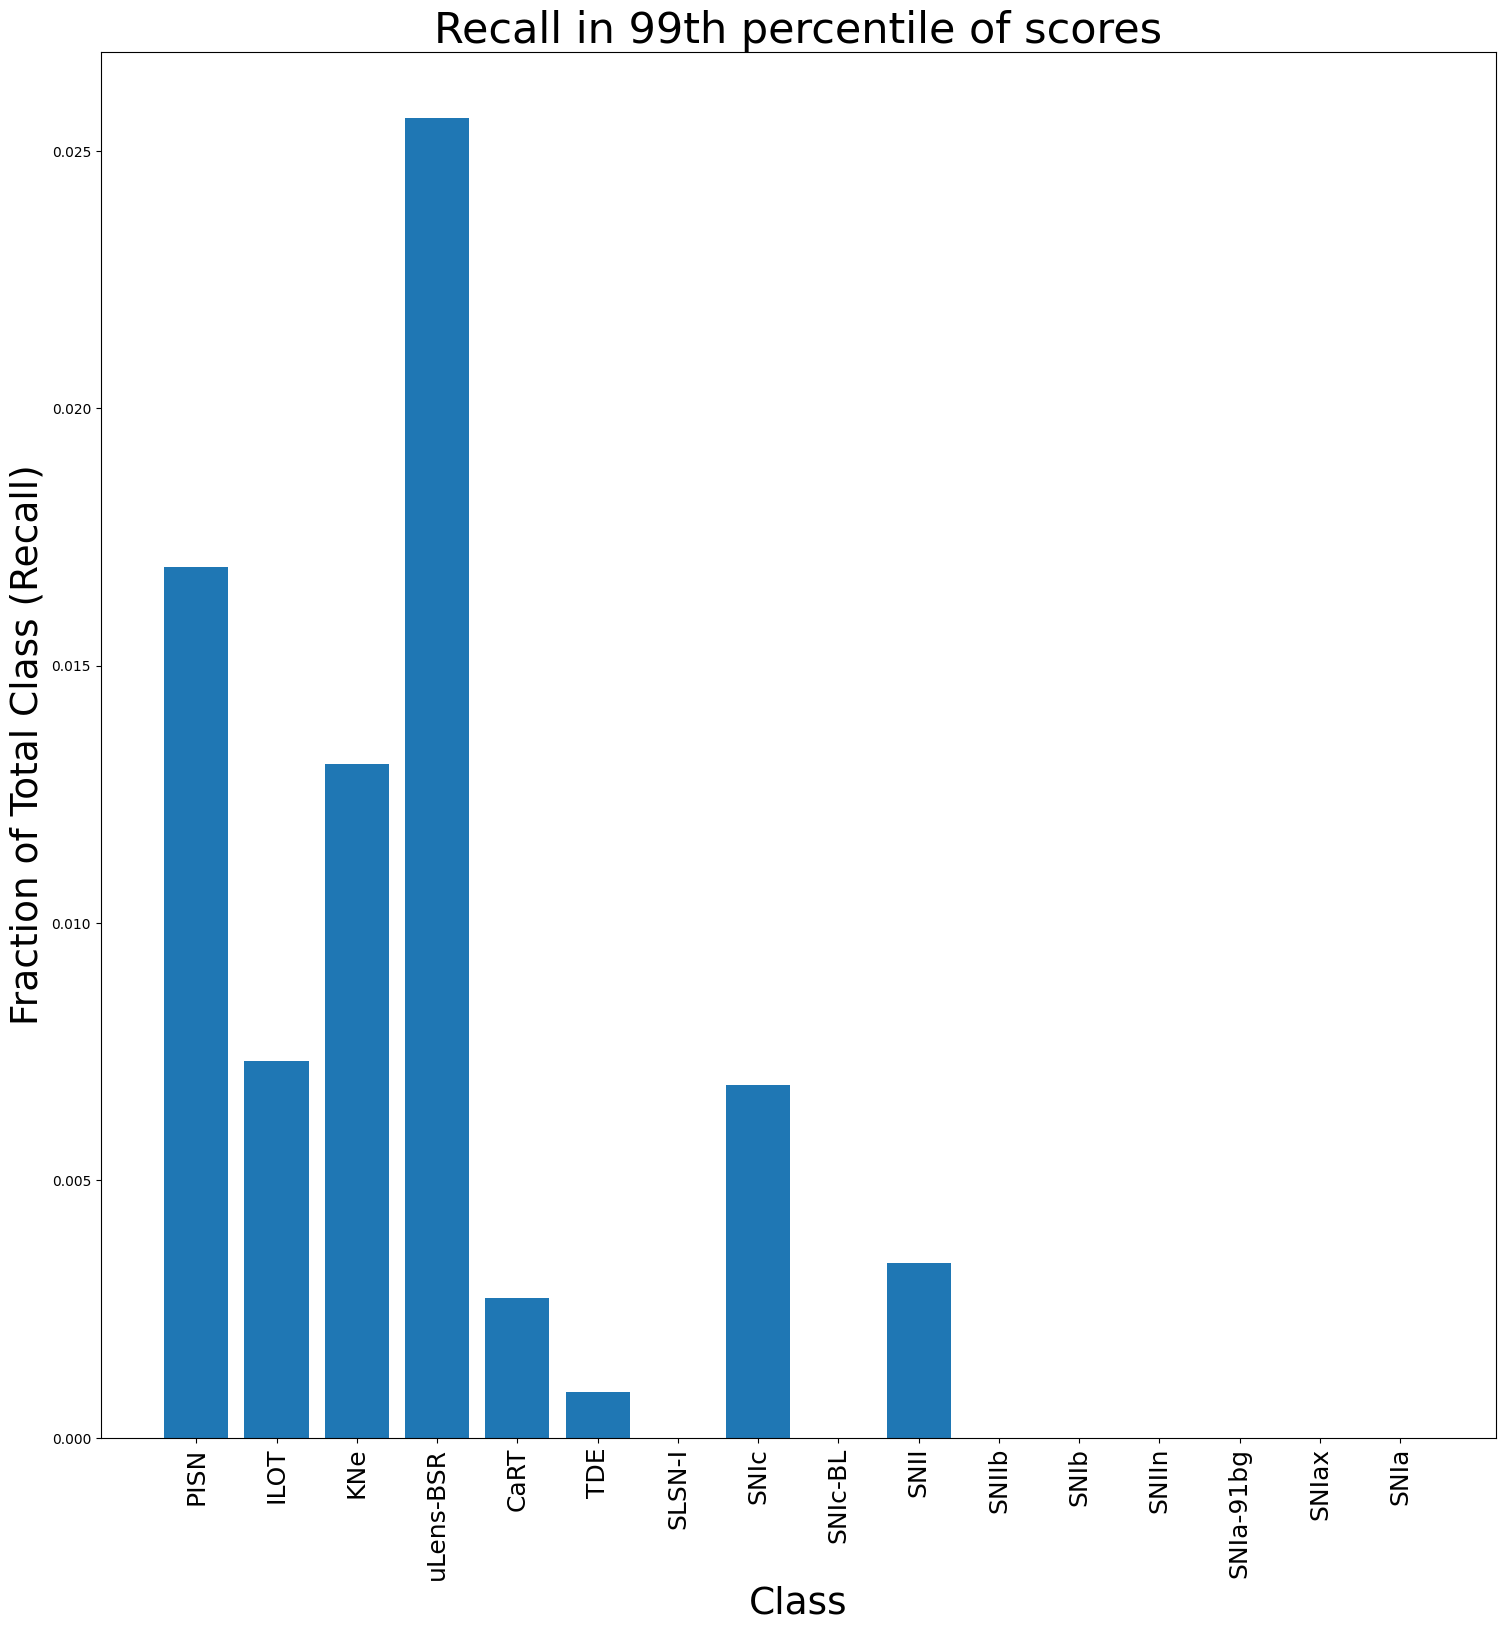

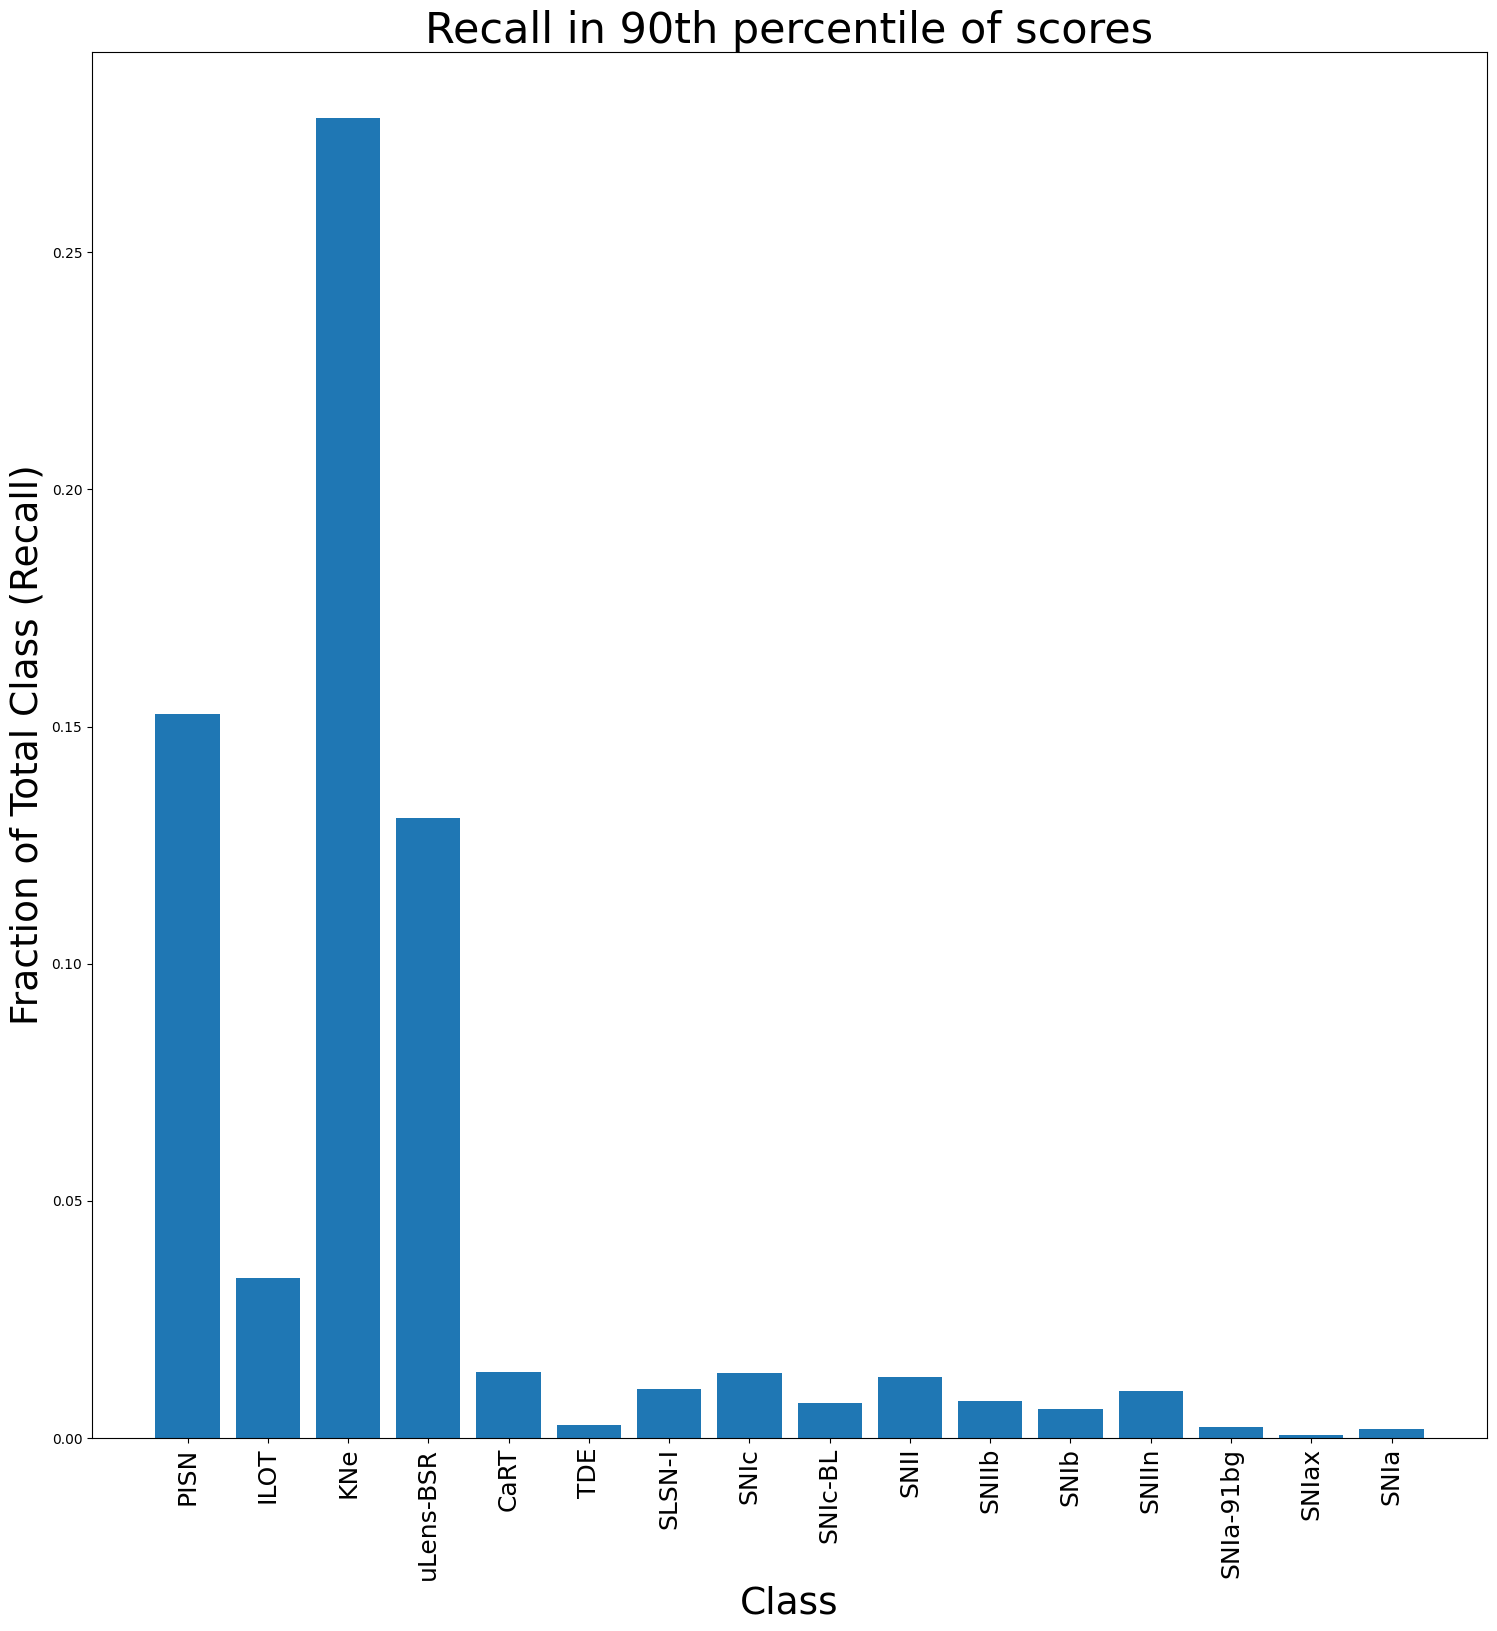

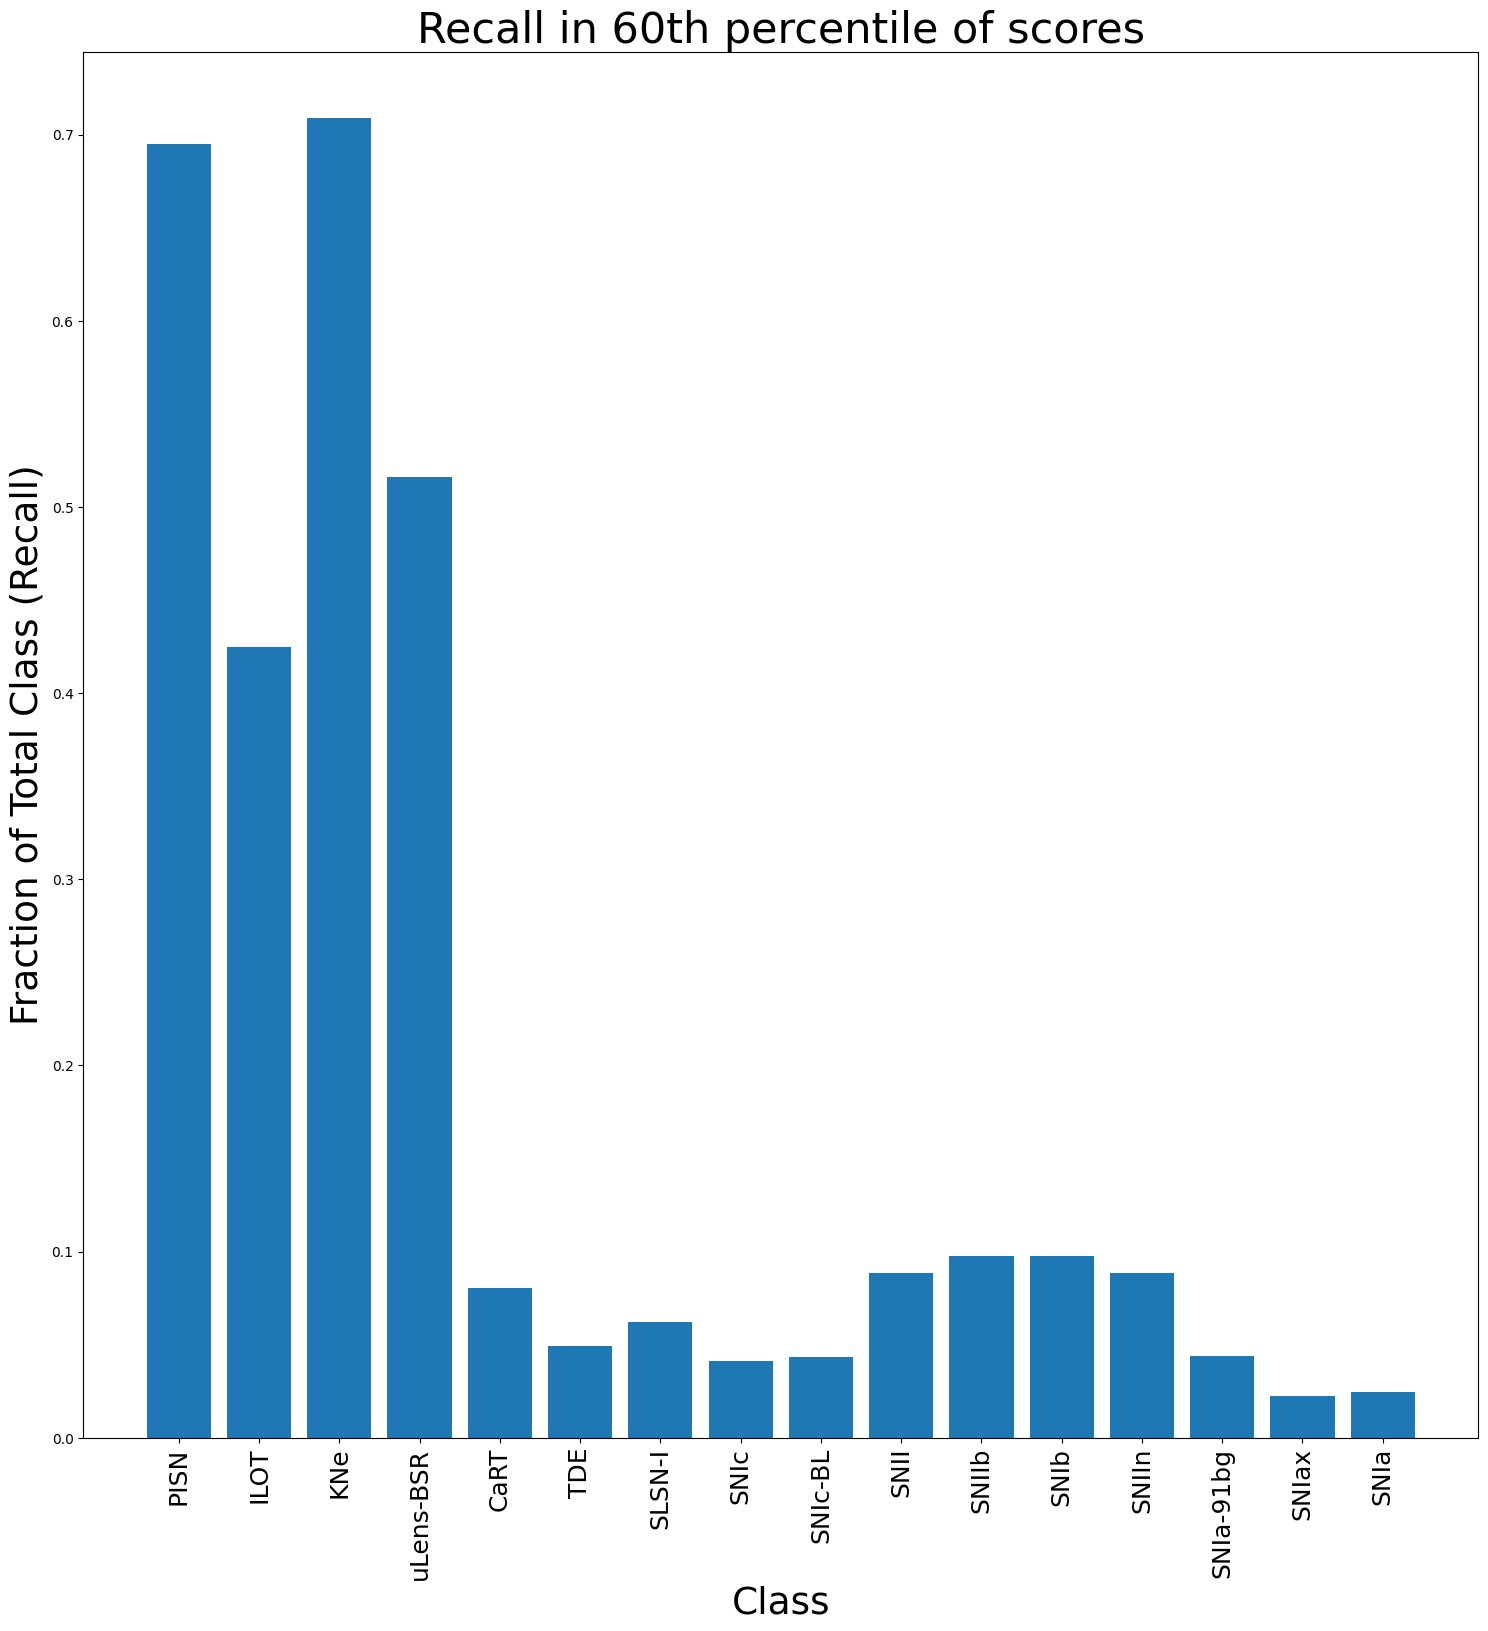

In [ ]:
for percentile in [1, 10, 40]:
#     print(np.percentile(np.append(scores, scores_anom, axis=0), percentile))
    create_frac_fig(np.percentile(np.append(-np.array(mult_iso_maj), -np.array(mult_iso_min), axis=0), percentile), percentile, -np.array(mult_iso_maj), -np.array(mult_iso_min), [1/5] * 5 + [10/11] * 11)


for percentile in [1, 10, 40]:
    create_comp_fig(np.percentile(np.append(-np.array(mult_iso_maj), -np.array(mult_iso_min), axis=0), percentile), percentile, -np.array(mult_iso_maj), -np.array(mult_iso_min))

In [ ]:
precision = {i : [] for i in file_to_class.values()}
recall = {i : [] for i in file_to_class.values()}
thresholds = []
for threshold in np.arange(0, max(np.max(mult_iso_min), np.max(mult_iso_min)), 0.01):
  print(threshold)
  pre = create_frac_fig(threshold, -1, -np.array(mult_iso_maj), -np.array(mult_iso_min), [1] * 5 + [10] * 11, ret=True)
  rec = create_comp_fig(threshold, -1, -np.array(mult_iso_maj), -np.array(mult_iso_min), ret=True)

  for i in file_to_class.values():
    precision[i].append(pre[i])
    recall[i].append(rec[i])


  thresholds.append(threshold)

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23


In [ ]:
from sklearn.metrics import auc

for ind, class_ in enumerate(anom_classes):
  class_ = file_to_class[class_]
  plt.plot(recall[class_], precision[class_], label=f"{class_} ({auc(recall[class_], precision[class_])})")

plt.legend()
plt.show()

for ind, class_ in enumerate(non_anom_classes):
  class_ = file_to_class[class_]
  plt.plot(recall[class_], precision[class_], label=f"{class_} ({auc(recall[class_], precision[class_])})")

plt.legend()
plt.show()

for ind, class_ in enumerate(file_to_class.values()):
  plt.plot(thresholds, precision[class_])

plt.show()
for ind, class_ in enumerate(file_to_class.values()):
  plt.plot(thresholds, recall[class_])



In [ ]:
# Single Isolation Forest
class_weights = {i : 0 for i in range(y_train.shape[1])}

for value in y_train:
  class_weights[np.argmax(value)]+=1

for id in class_weights.keys():
  class_weights[id] = len(y_train) / class_weights[id]

sample_weights = [class_weights[np.argmax(i)] for i in y_train]

from sklearn.ensemble import IsolationForest

anomaly_detector = IsolationForest(random_state=0, max_samples = 'auto', n_estimators=200).fit(train_predictions, sample_weight=sample_weights)

In [ ]:
def get_anomaly_scores(observations):
  anomaly_scores = -anomaly_detector.decision_function(observations)

  return anomaly_scores

In [ ]:
scores = -anomaly_detector.decision_function(latent_observations_majority)
scores_anom = -anomaly_detector.decision_function(latent_observations_minority)

In [ ]:
total_counts = {i : 0 for i in file_to_class.values()}
average_score = {i : 0 for i in file_to_class.values()}


for i in range(len(scores)):
    total_counts[file_to_class[non_anom_classes[np.argmax(y_test[i])]]] += 1
    average_score[file_to_class[non_anom_classes[np.argmax(y_test[i])]]] += scores[i]

for i in range(len(scores_anom)):
    total_counts[file_to_class[y_data_anom[i]]] += 1
    average_score[file_to_class[y_data_anom[i]]] += scores_anom[i]

for i in file_to_class.values():
  average_score[i]/=total_counts[i]

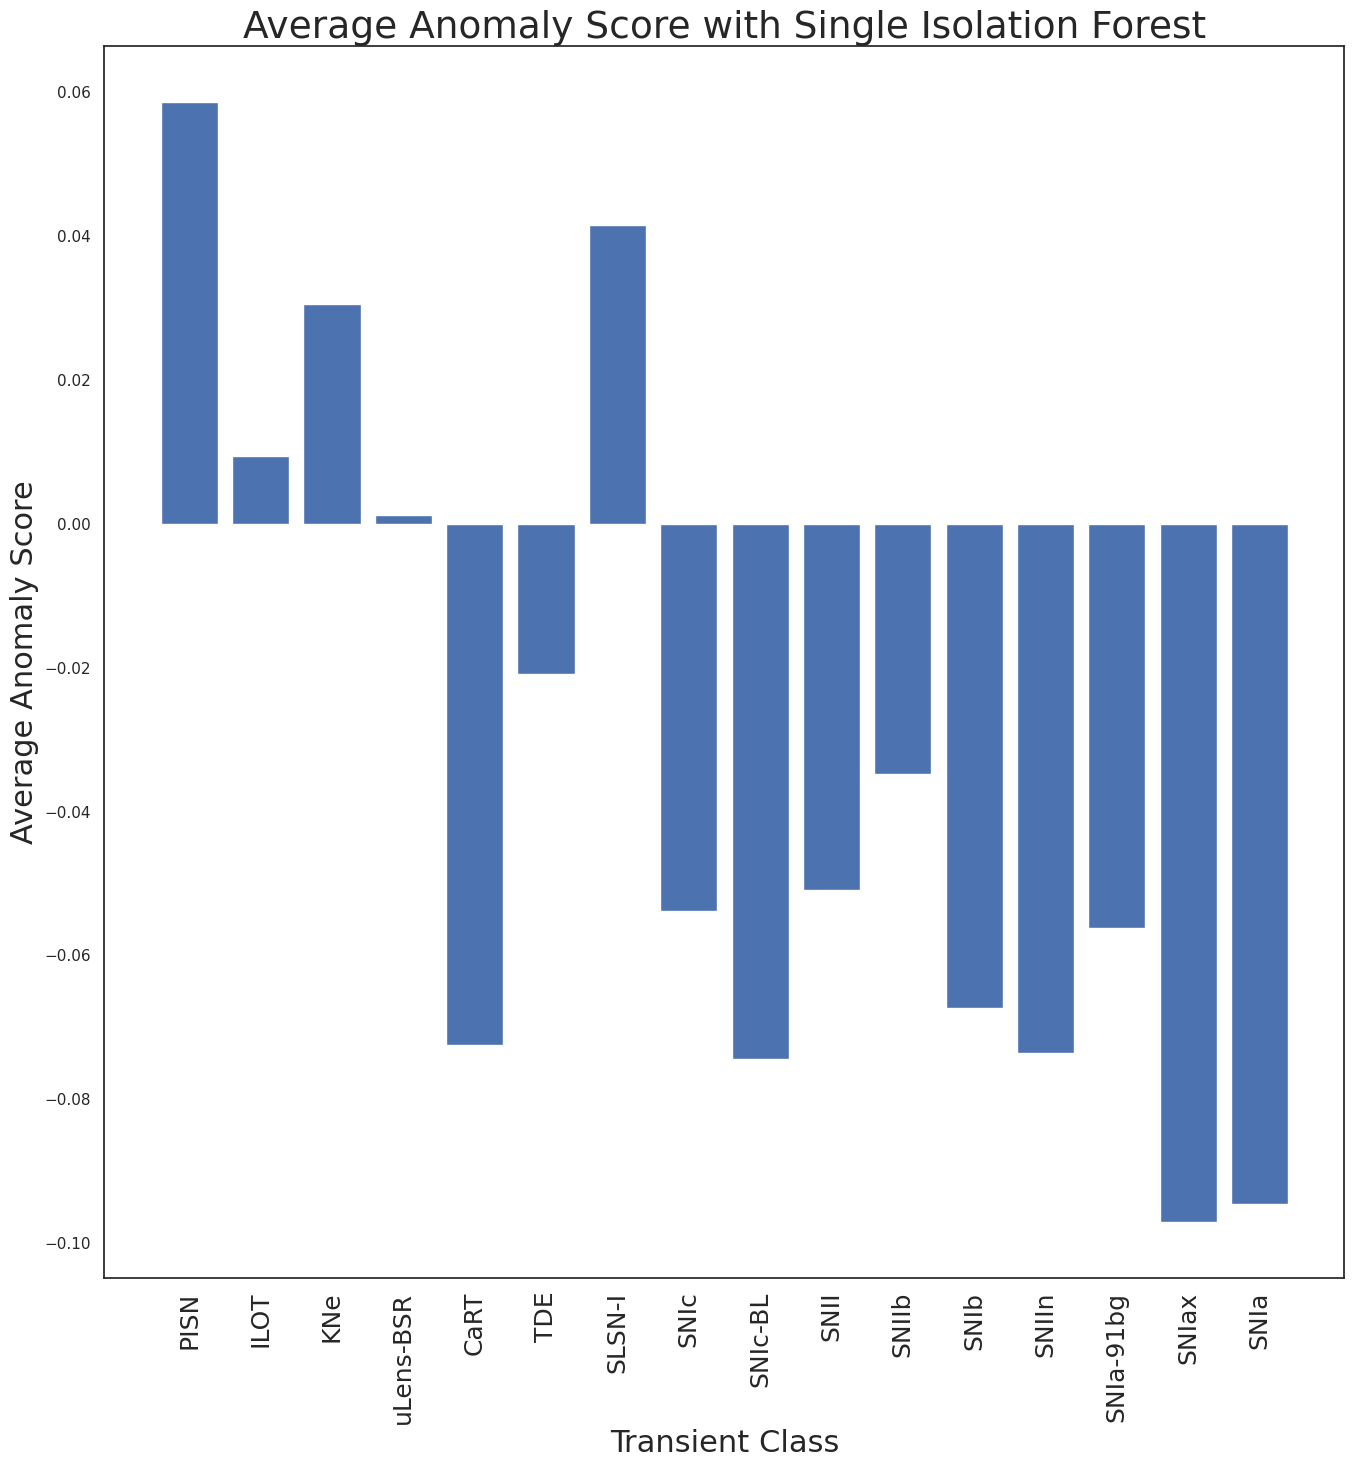

In [ ]:


plt.figure(figsize=(16, 16))
plt.bar(*zip(*average_score.items()))
plt.xticks(list(average_score.keys()), rotation=90, fontsize=18)


plt.xlabel("Transient Class", fontsize=22)
plt.ylabel("Average Anomaly Score", fontsize=22)
plt.title('Average Anomaly Score with Single Isolation Forest', fontsize=27)

plt.savefig(f"{figpath}/AverageScore_bad")